In [1]:
# do the hyperparameter tuning and then save the best in seed tomorrow

In [1]:
%load_ext autoreload

In [166]:
%autoreload 2

In [167]:
# pip install gymnasium

In [168]:
import RME_file as RME
import numpy as np
import pandas as pd
import random
import gymnasium
import matplotlib.pyplot as plt
import math
from mazeFigure import MazeEnvironment
from plotVandQ import *
from utilities import *
from algorithms import *

In [4]:
gymnasium.register(id = 'RME-mark0', entry_point= RME.RandomMazeEnvironment)

In [5]:
env = gymnasium.make('RME-mark0')

In [66]:
gamma = 0.99
noEpisodes = 50
maxSteps = 1000
decayConstAlpha = 0.01
decayConstEpsilon = 0.01
lambda_ = 0.1
noPlanning = 10
maxTrajectory = 10
notypeDecay = ['exponential', 'linear']

# Problem 1

In [172]:
noEpisodes = 500
decayConstAlpha = 0.01
decayConstEpsilon = 0.01

In [75]:
policy1, episodic_q1, value_function1, q1 = MonteCarloControl(env, gamma, maxSteps, noEpisodes, decayConstAlpha, decayConstEpsilon, notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.001701  0.994896  0.001701  0.001701
1   0.001701  0.994896  0.001701  0.001701
2   0.001701  0.994896  0.001701  0.001701
3   0.250000  0.250000  0.250000  0.250000
4   0.994896  0.001701  0.001701  0.001701
5   0.250000  0.250000  0.250000  0.250000
6   0.994896  0.001701  0.001701  0.001701
7   0.250000  0.250000  0.250000  0.250000
8   0.994896  0.001701  0.001701  0.001701
9   0.994687  0.001771  0.001771  0.001771
10  0.001771  0.001771  0.994687  0.001771
11  0.001862  0.001862  0.994415  0.001862

Deterministic Policy:
[0.99489575 0.99489575 0.99489575 0.25       0.99489575 0.25
 0.99489575 0.25       0.99489575 0.99468744 0.99468744 0.99441506]

Actions according to deterministic policy: [1 1 1 0 0 0 0 0 0 0 2 2]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | →  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ↑  | H✥ |
  __

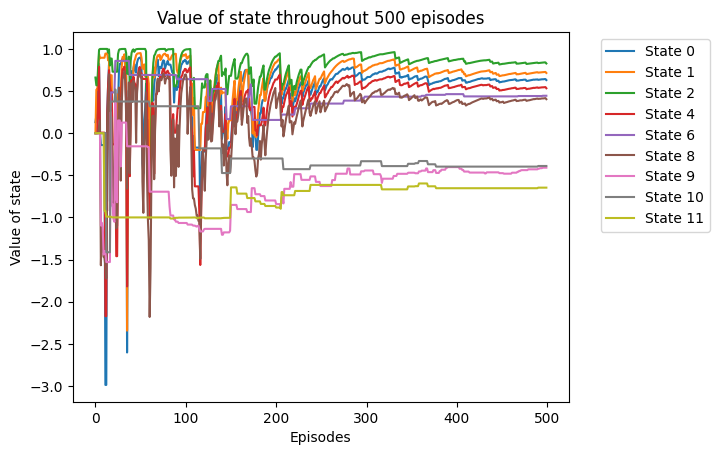

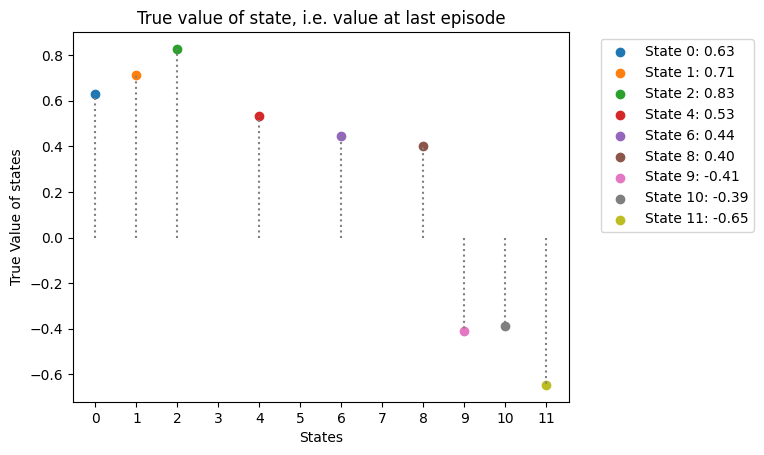

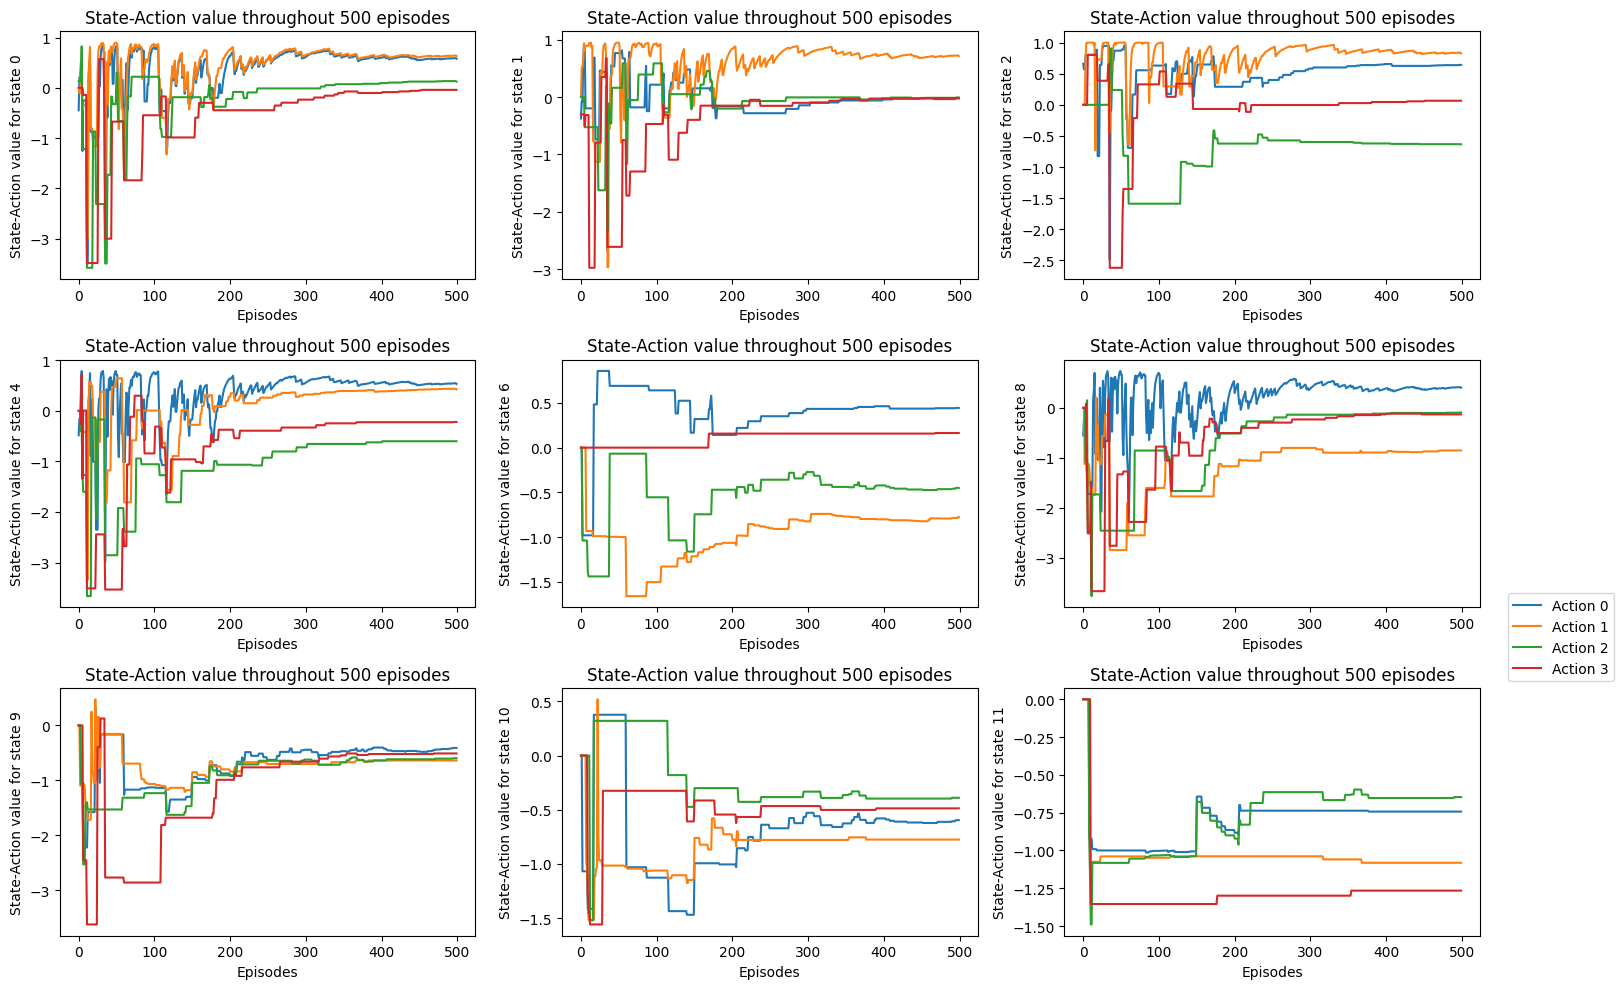

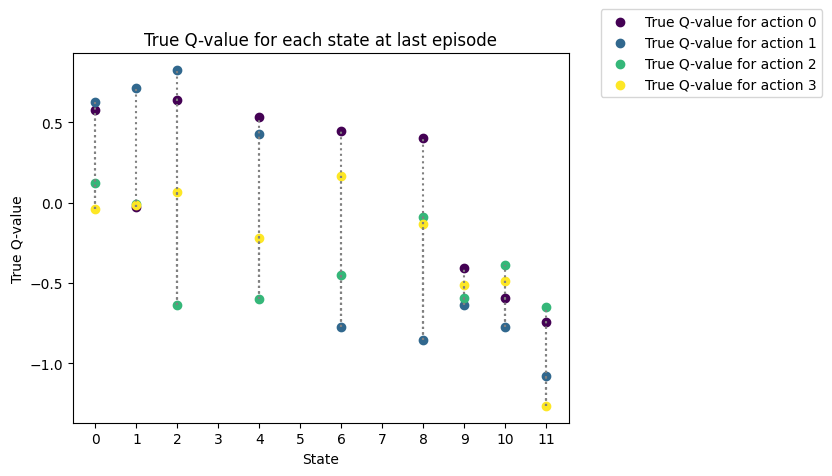

In [173]:
showPlot(policy1, value_function1, episodic_q1, noEpisodes)

# Problem 2

In [184]:
noEpisodes = 1000
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value

In [186]:
# random.seed(2)
policy2, episodic_q2, value_function2, q2 = SARSA(env, gamma, decayConstAlpha, decayConstEpsilon, noEpisodes, notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.000011  0.999966  0.000011  0.000011
1   0.000011  0.999966  0.000011  0.000011
2   0.000011  0.000011  0.000011  0.999966
3   0.250000  0.250000  0.250000  0.250000
4   0.999966  0.000011  0.000011  0.000011
5   0.250000  0.250000  0.250000  0.250000
6   0.999965  0.000012  0.000012  0.000012
7   0.250000  0.250000  0.250000  0.250000
8   0.999966  0.000011  0.000011  0.000011
9   0.000013  0.000013  0.999962  0.000013
10  0.000013  0.000013  0.000013  0.999962
11  0.000014  0.000014  0.000014  0.999957

Deterministic Policy:
[0.99996561 0.99996561 0.99996561 0.25       0.99996561 0.25
 0.99996526 0.25       0.99996561 0.99996161 0.99996161 0.99995671]

Actions according to deterministic policy: [1 1 3 0 0 0 0 0 0 2 3 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | ←  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ↑  | H✥ |
  __

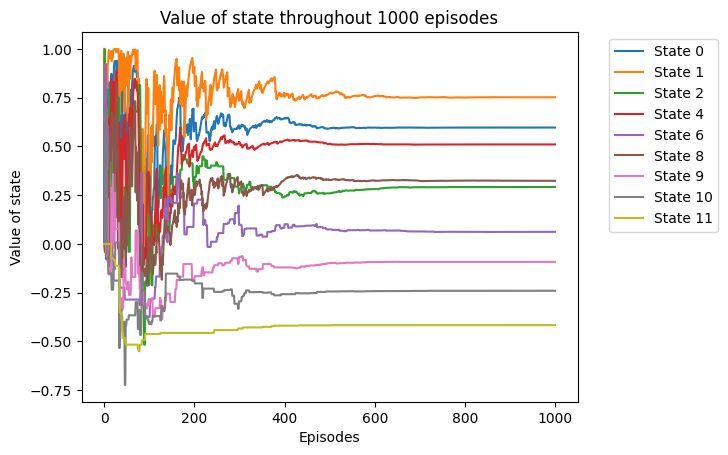

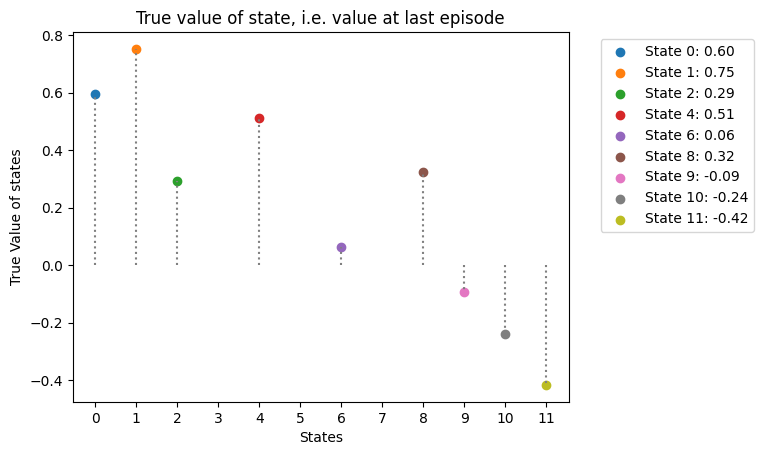

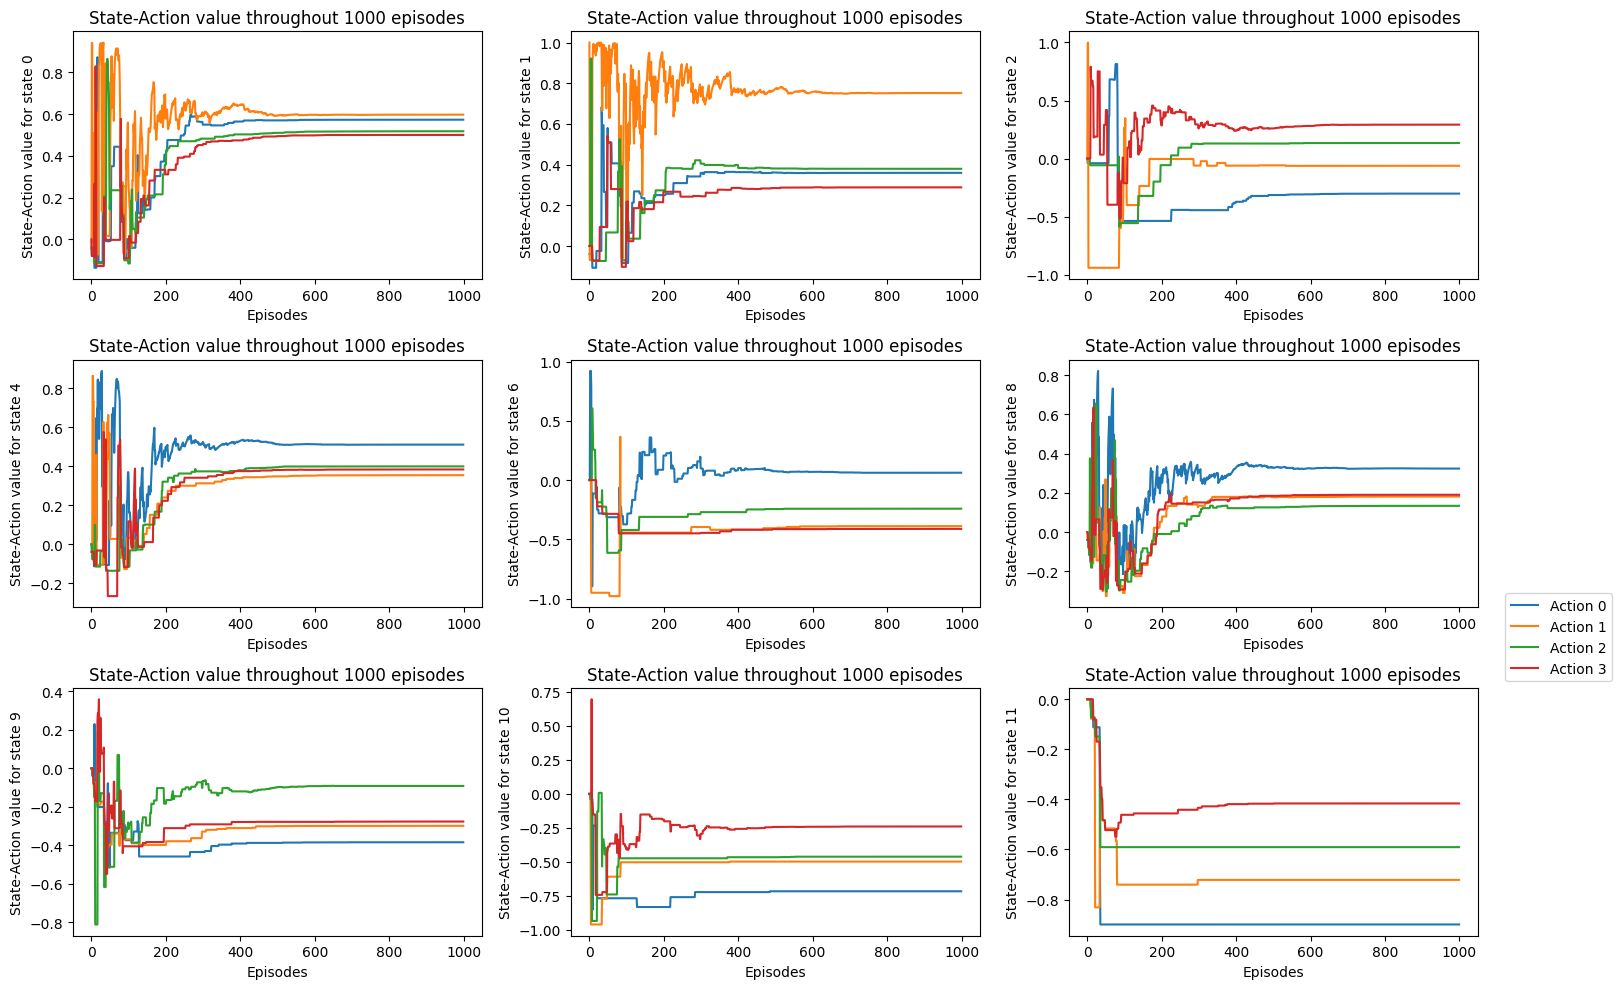

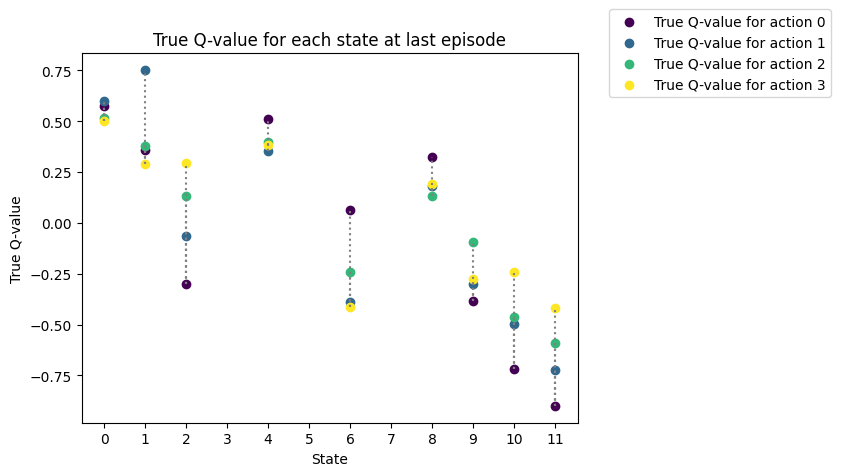

In [187]:
showPlot(policy2, value_function2, episodic_q2, noEpisodes)

# Problem 3

In [180]:
noEpisodes = 1000
decayConstAlpha = 0.02 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

In [125]:
# random.seed(3)
policy3, episodic_q3, value_function3, q3 = Qlearning(env, gamma, decayConstAlpha, decayConstEpsilon, noEpisodes, notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.000011  0.999966  0.000011  0.000011
1   0.000011  0.999966  0.000011  0.000011
2   0.999966  0.000011  0.000011  0.000011
3   0.250000  0.250000  0.250000  0.250000
4   0.999966  0.000011  0.000011  0.000011
5   0.250000  0.250000  0.250000  0.250000
6   0.999957  0.000014  0.000014  0.000014
7   0.250000  0.250000  0.250000  0.250000
8   0.999966  0.000011  0.000011  0.000011
9   0.000011  0.000011  0.000011  0.999966
10  0.000075  0.000075  0.000075  0.999775
11  0.068818  0.068818  0.068818  0.793547

Deterministic Policy:
[0.99996561 0.99996561 0.99996561 0.25       0.99996561 0.25
 0.99995671 0.25       0.99996561 0.99996561 0.99977461 0.79354691]

Actions according to deterministic policy: [1 1 0 0 0 0 0 0 0 3 3 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | ↑  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ↑  | H✥ |
  __

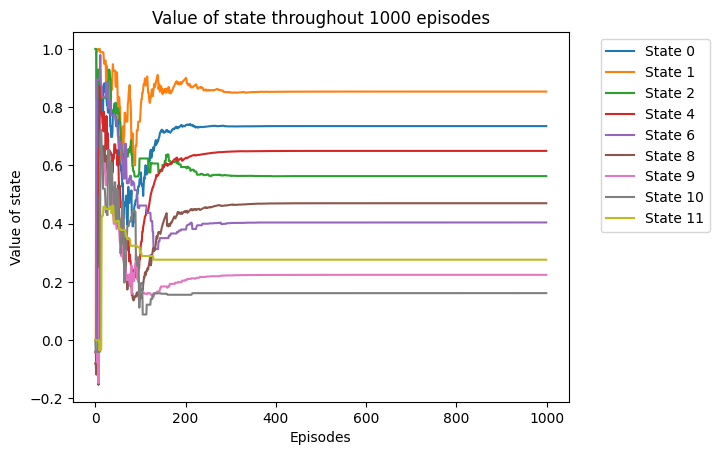

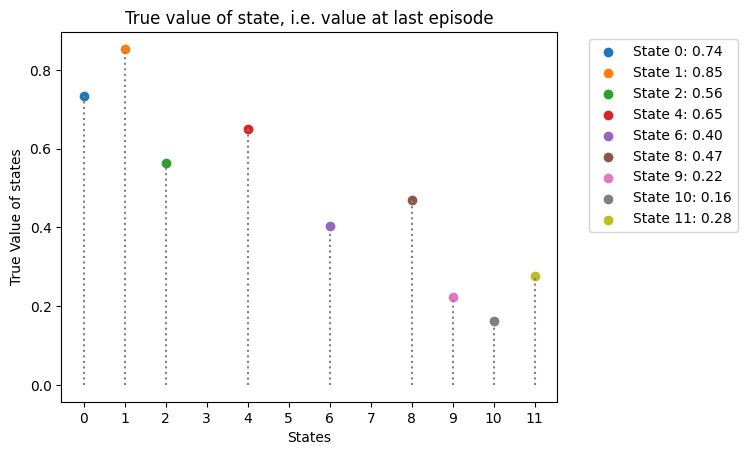

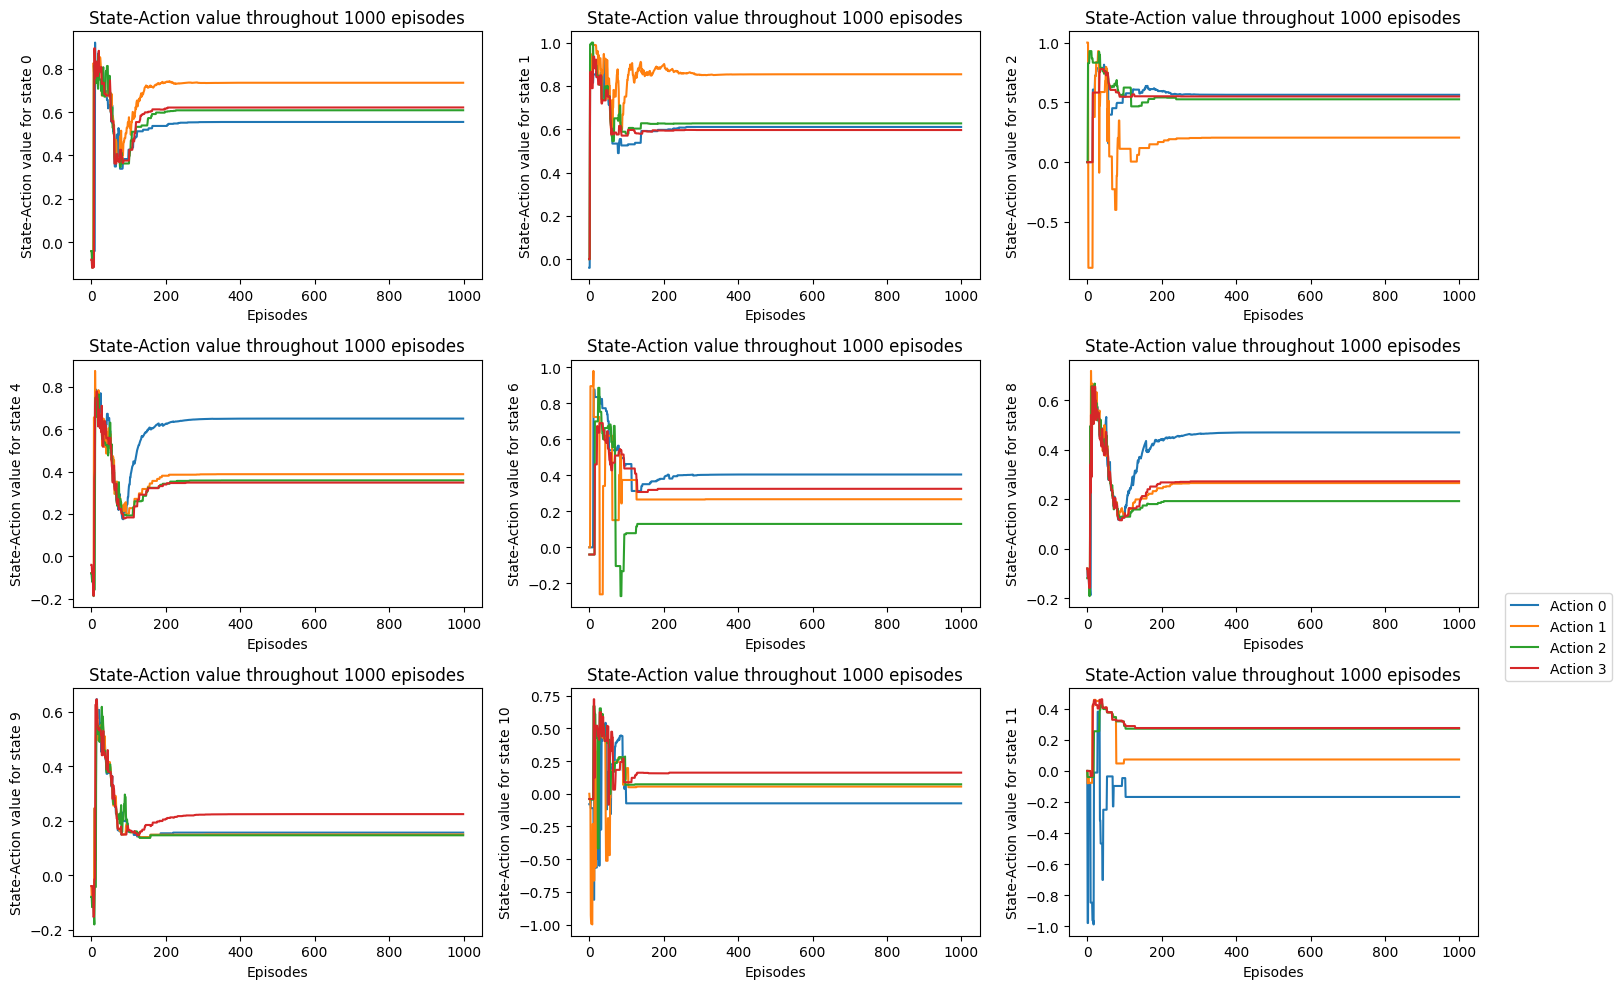

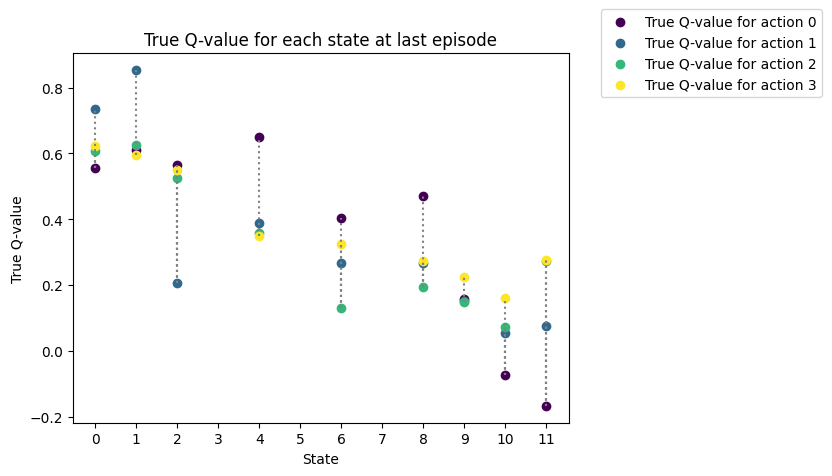

In [181]:
showPlot(policy3, value_function3, episodic_q3, noEpisodes)

# Problem 4

In [182]:
noEpisodes = 800
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.015 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

In [164]:
# random.seed(4)
policy4, episodic_q4, value_function4, q4 = doubleQlearning(env, gamma, decayConstAlpha, decayConstEpsilon, noEpisodes, notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.000002  0.999995  0.000002  0.000002
1   0.000002  0.999995  0.000002  0.000002
2   0.000002  0.999995  0.000002  0.000002
3   0.250000  0.250000  0.250000  0.250000
4   0.999995  0.000002  0.000002  0.000002
5   0.250000  0.250000  0.250000  0.250000
6   0.000002  0.000002  0.000002  0.999994
7   0.250000  0.250000  0.250000  0.250000
8   0.999995  0.000002  0.000002  0.000002
9   0.000002  0.999995  0.000002  0.000002
10  0.999995  0.000002  0.000002  0.000002
11  0.999995  0.000002  0.000002  0.000002

Deterministic Policy:
[0.99999532 0.99999532 0.99999532 0.25       0.99999532 0.25
 0.99999448 0.25       0.99999532 0.99999511 0.99999511 0.99999511]

Actions according to deterministic policy: [1 1 1 0 0 0 3 0 0 1 0 0]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | →  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ←  | H✥ |
  __

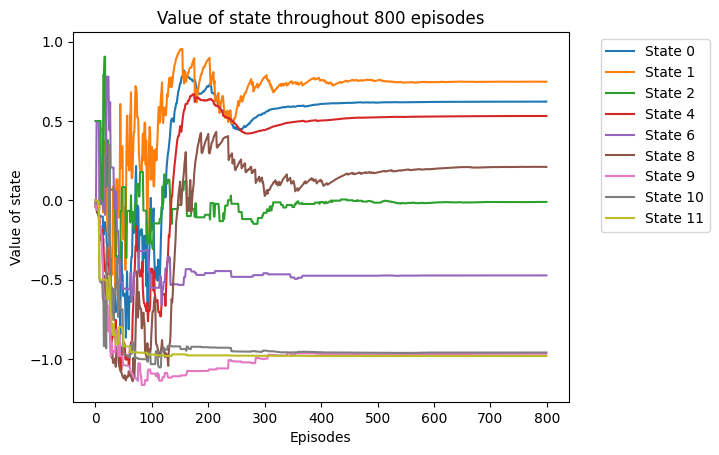

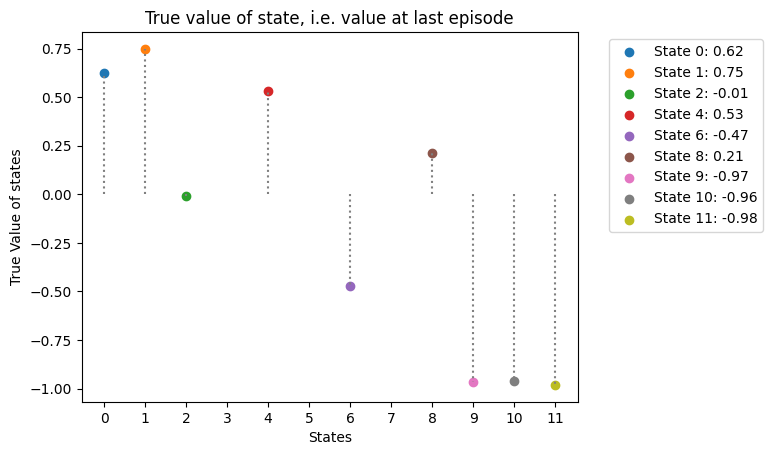

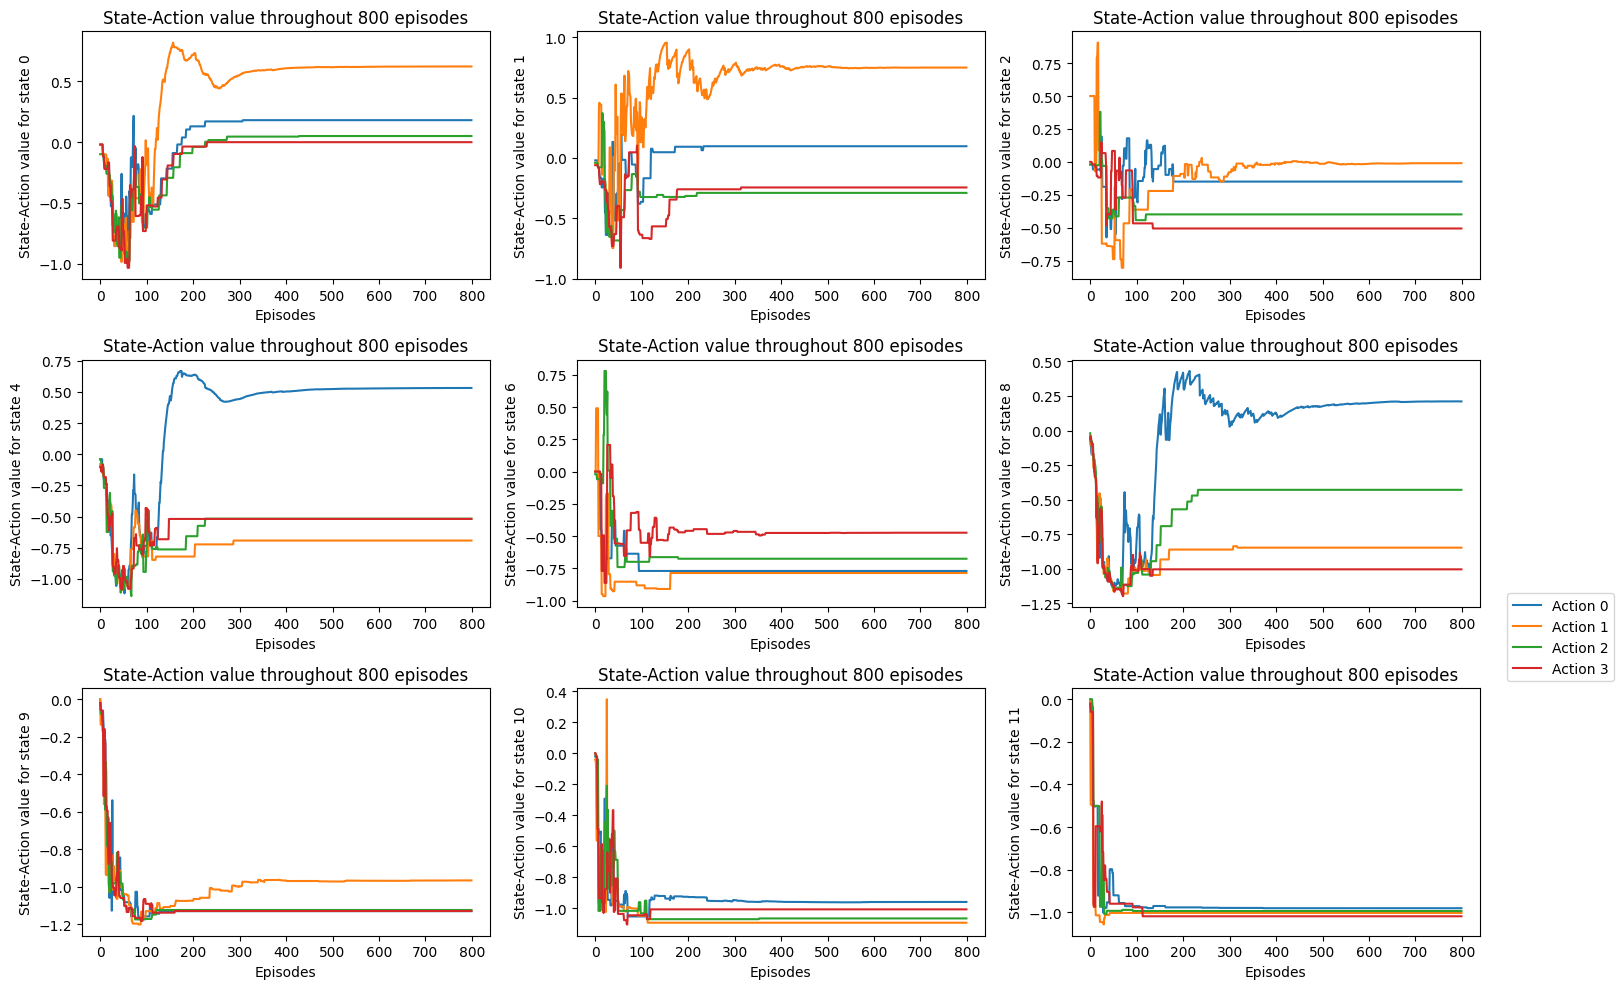

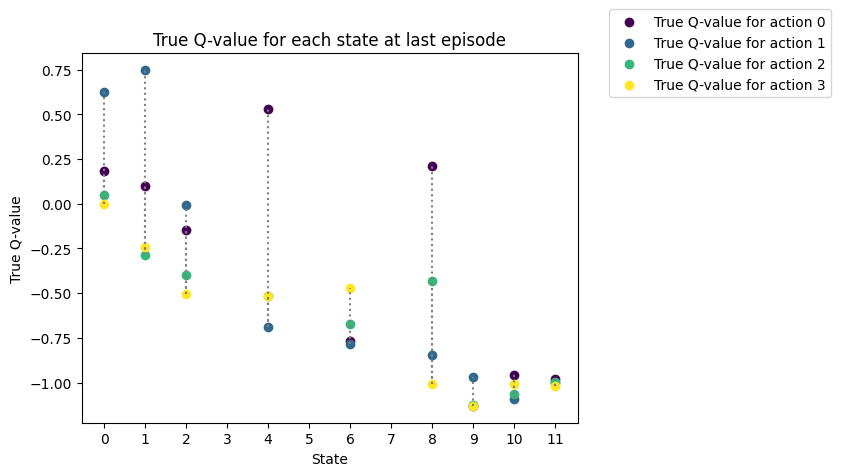

In [183]:
showPlot(policy4, value_function4, episodic_q4, noEpisodes)

# Problem 6

In [216]:
noEpisodes = 1000
lambda_ = 0.2
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

In [217]:
# random.seed(5)
policy5, episodic_q5, value_function5, q5 = SARSA_Lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = True, typeDecay= notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.000011  0.999966  0.000011  0.000011
1   0.000011  0.999966  0.000011  0.000011
2   0.000011  0.999966  0.000011  0.000011
3   0.250000  0.250000  0.250000  0.250000
4   0.999966  0.000011  0.000011  0.000011
5   0.250000  0.250000  0.250000  0.250000
6   0.999965  0.000012  0.000012  0.000012
7   0.250000  0.250000  0.250000  0.250000
8   0.999966  0.000011  0.000011  0.000011
9   0.000012  0.000012  0.999965  0.000012
10  0.999965  0.000012  0.000012  0.000012
11  0.000025  0.000025  0.000025  0.999924

Deterministic Policy:
[0.99996561 0.99996561 0.99996561 0.25       0.99996561 0.25
 0.99996456 0.25       0.99996561 0.99996456 0.99996456 0.99992422]

Actions according to deterministic policy: [1 1 1 0 0 0 0 0 0 2 0 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | →  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ↑  | H✥ |
  __

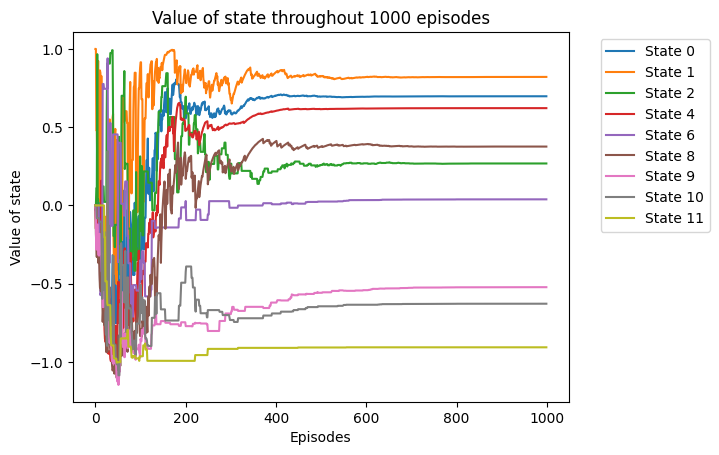

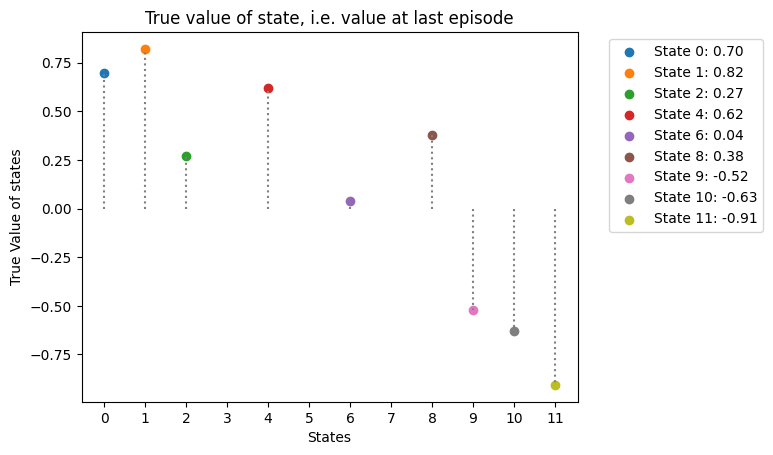

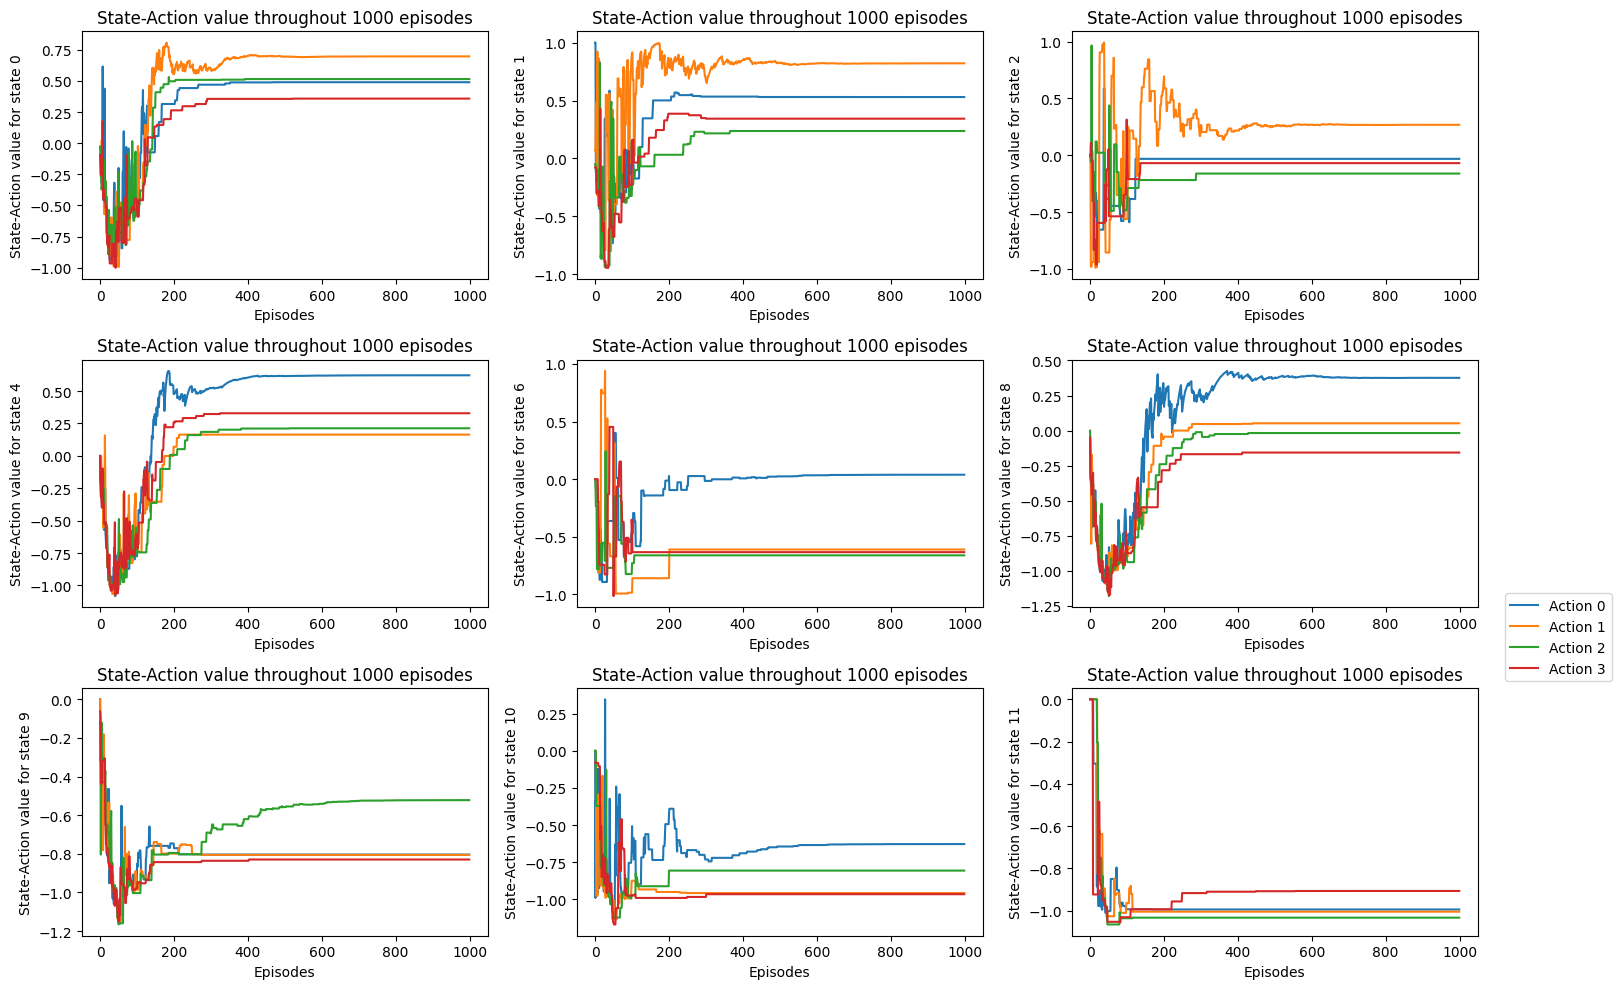

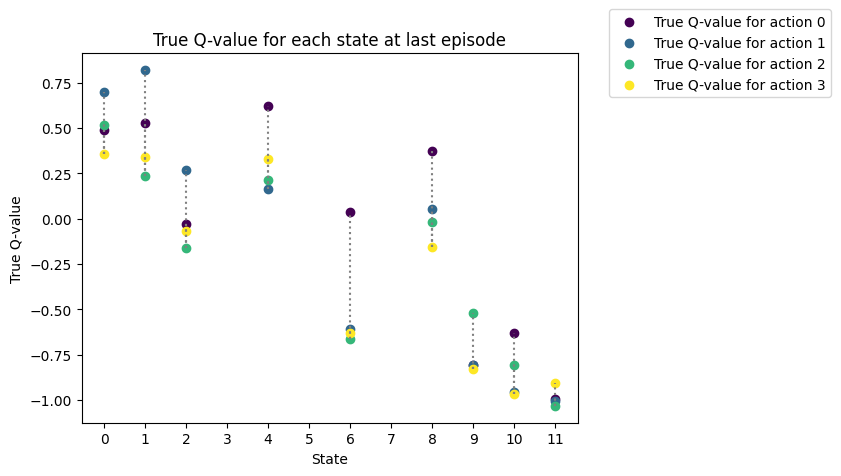

In [218]:
showPlot(policy5, value_function5, episodic_q5, noEpisodes)

# Problem 7

In [ ]:
# checked that all the changes saturate at lower episodes and thus took 25 as maxEpisodes, 
# kept all parameter constant and changed lambda to until only the necessary conditions are met 
# Necessary conditions: dont fall in hole, go in goal

In [306]:
noEpisodes = 25
lambda_ = 0.5
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

Hyper-parameter lambda: 0.8500000000000001
Stochastic Policy:
           0         1         2         3
0   0.404100  0.198633  0.198633  0.198633
1   0.198633  0.404100  0.198633  0.198633
2   0.200630  0.398111  0.200630  0.200630
3   0.250000  0.250000  0.250000  0.250000
4   0.198633  0.198633  0.404100  0.198633
5   0.250000  0.250000  0.250000  0.250000
6   0.198633  0.198633  0.198633  0.404100
7   0.250000  0.250000  0.250000  0.250000
8   0.410029  0.196657  0.196657  0.196657
9   0.410029  0.196657  0.196657  0.196657
10  0.196657  0.410029  0.196657  0.196657
11  0.196657  0.196657  0.196657  0.410029

Deterministic Policy:
[0.4040998 0.4040998 0.3981109 0.25      0.4040998 0.25      0.4040998
 0.25      0.4100291 0.4100291 0.4100291 0.4100291]

Actions according to deterministic policy: [0 1 1 0 2 0 3 0 0 0 1 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| ↑  | →  | →  | G✥|
  ___  ___

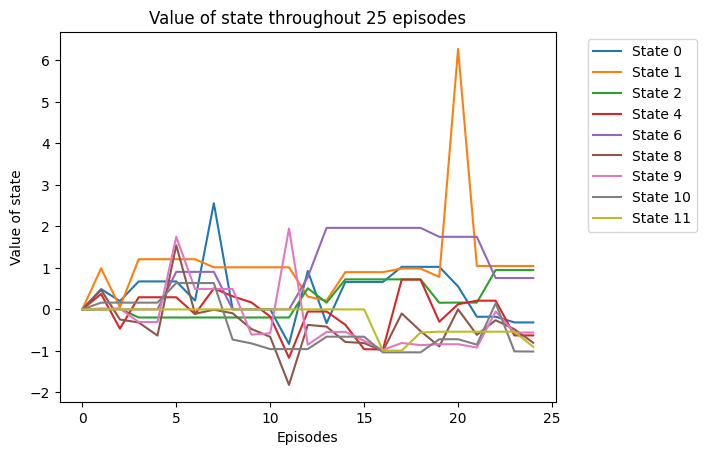

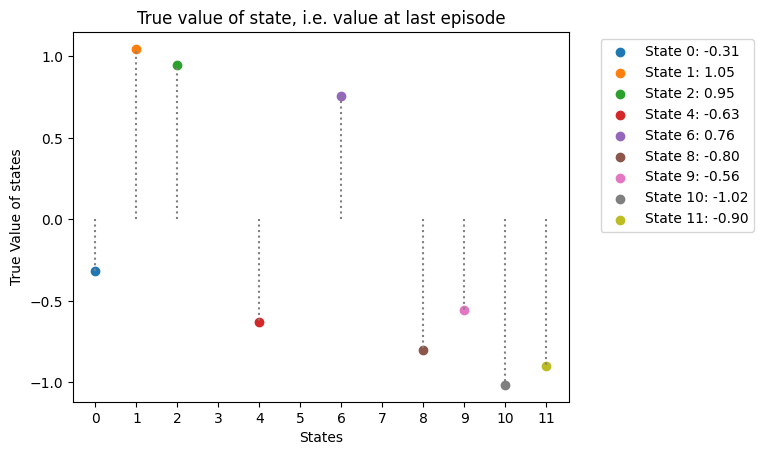

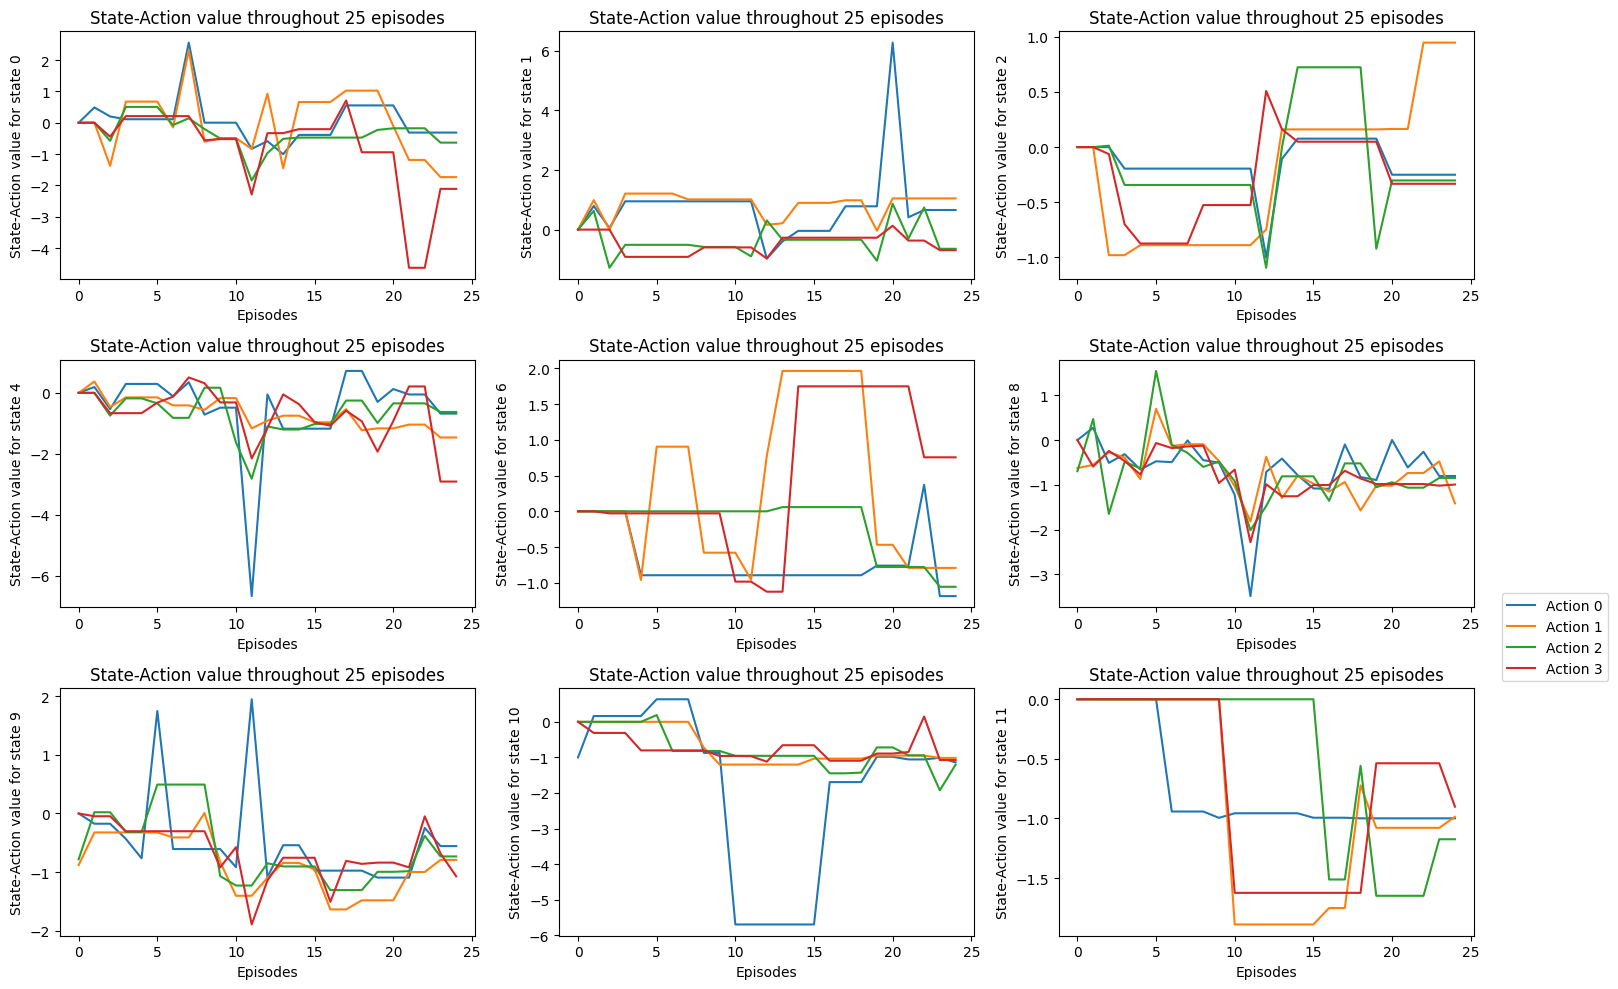

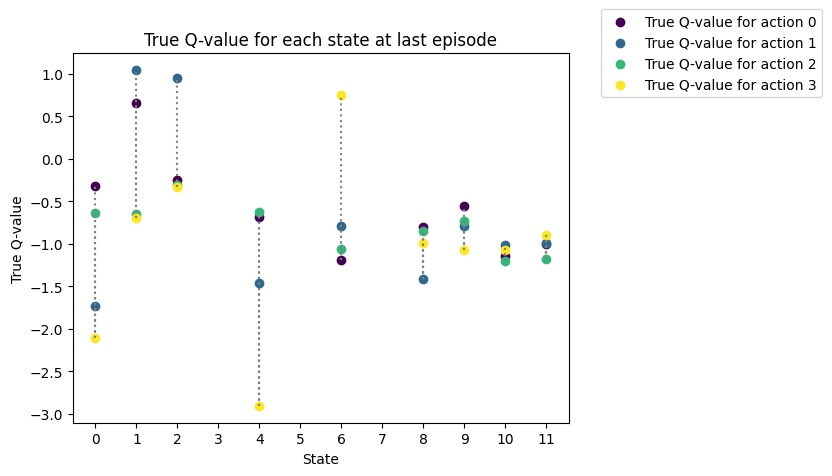

In [312]:
# hyper-parameter tuning
for lambda_ in np.arange(0, 1.01, 0.05):

    policy6, episodic_q6, value_function6, q6 = SARSA_Lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = False, typeDecay= notypeDecay[0])
    detP, corrA = deterministicPolicy(policy6)

    if corrA[2] == 1 and corrA[4] != 0 and corrA[6] != 1 and corrA[11] != 0:
        print(f'Hyper-parameter lambda: {lambda_}')
        showPlot(policy6, value_function6, episodic_q6, noEpisodes)
        break

In [313]:
# policy6, episodic_q6, value_function6, q6 = SARSA_Lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = False, typeDecay= notypeDecay[0])

Hyper-parameter lambda: 0.8500000000000001
Stochastic Policy:
           0         1         2         3
0   0.404100  0.198633  0.198633  0.198633
1   0.198633  0.404100  0.198633  0.198633
2   0.200630  0.398111  0.200630  0.200630
3   0.250000  0.250000  0.250000  0.250000
4   0.198633  0.198633  0.404100  0.198633
5   0.250000  0.250000  0.250000  0.250000
6   0.198633  0.198633  0.198633  0.404100
7   0.250000  0.250000  0.250000  0.250000
8   0.410029  0.196657  0.196657  0.196657
9   0.410029  0.196657  0.196657  0.196657
10  0.196657  0.410029  0.196657  0.196657
11  0.196657  0.196657  0.196657  0.410029

Deterministic Policy:
[0.4040998 0.4040998 0.3981109 0.25      0.4040998 0.25      0.4040998
 0.25      0.4100291 0.4100291 0.4100291 0.4100291]

Actions according to deterministic policy: [0 1 1 0 2 0 3 0 0 0 1 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| ↑  | →  | →  | G✥|
  ___  ___

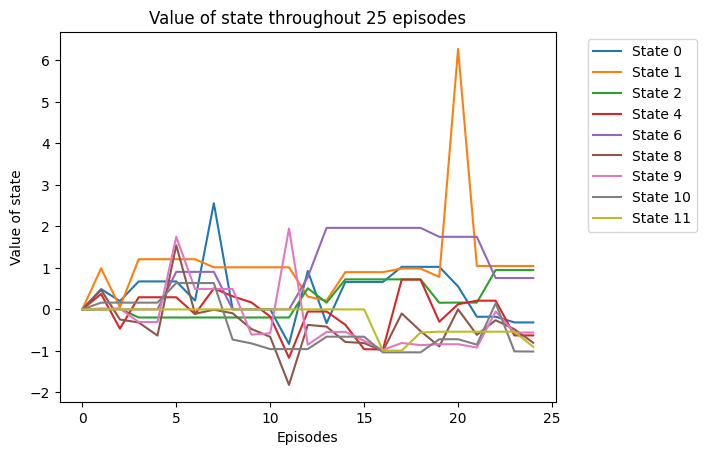

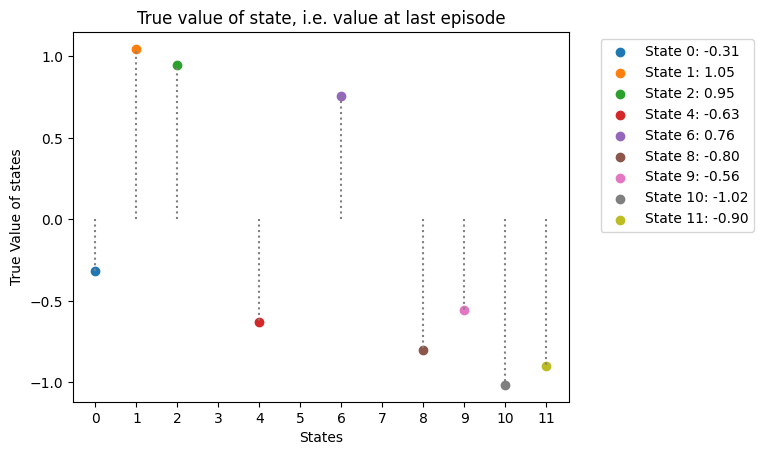

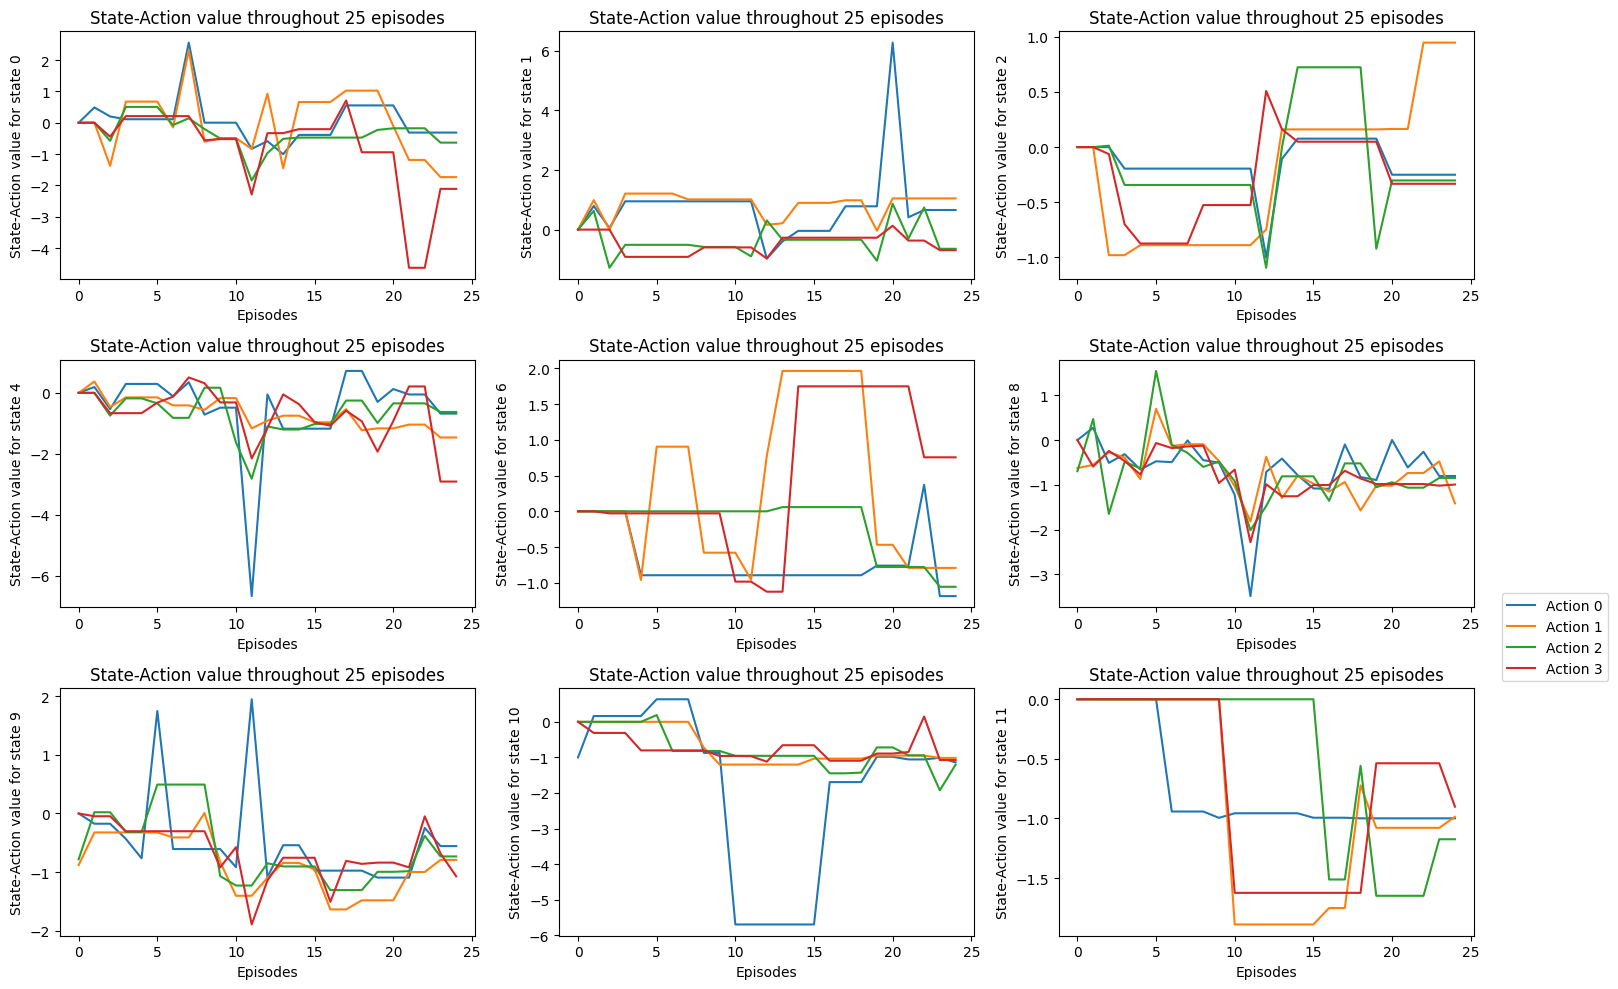

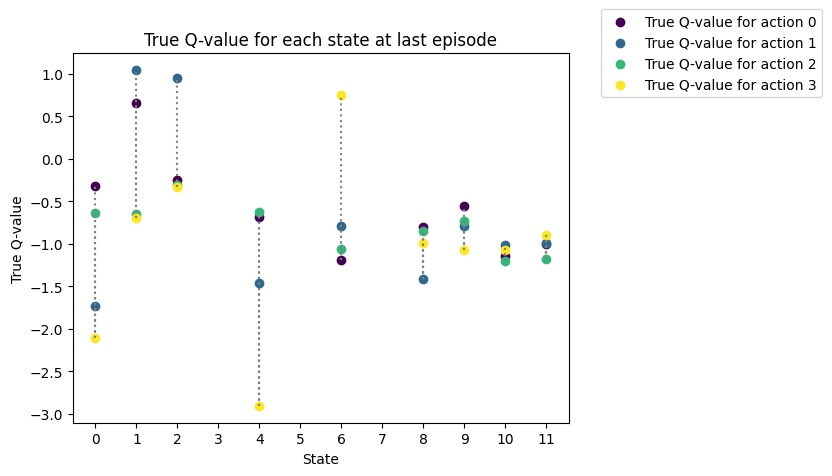

In [316]:
print(f'Hyper-parameter lambda: {lambda_}')
showPlot(policy6, value_function6, episodic_q6, noEpisodes)

# Problem 8

In [328]:
# checked that all the changes saturate at lower episodes and thus took 25 as maxEpisodes, 
# kept all parameter constant and changed lambda to until only the necessary conditions are met 
# Necessary conditions: dont fall in hole, go in goal

In [344]:
noEpisodes = 410
lambda_ = 0.91
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

In [345]:
policy7, episodic_q7, value_function7, q7 = Q_lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = True, typeDecay= notypeDecay[0])

Hyper-parameter lambda: 0.53
Stochastic Policy:
           0         1         2         3
0   0.004185  0.987446  0.004185  0.004185
1   0.004185  0.987446  0.004185  0.004185
2   0.004185  0.987446  0.004185  0.004185
3   0.250000  0.250000  0.250000  0.250000
4   0.004185  0.987446  0.004185  0.004185
5   0.250000  0.250000  0.250000  0.250000
6   0.004533  0.004533  0.004533  0.986400
7   0.250000  0.250000  0.250000  0.250000
8   0.987446  0.004185  0.004185  0.004185
9   0.004488  0.004488  0.004488  0.986535
10  0.005163  0.005163  0.005163  0.984512
11  0.056909  0.056909  0.829272  0.056909

Deterministic Policy:
[0.98744557 0.98744557 0.98744557 0.25       0.98744557 0.25
 0.98639995 0.25       0.98744557 0.98653528 0.98451188 0.82927173]

Actions according to deterministic policy: [1 1 1 0 1 0 3 0 0 3 3 2]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | →  | G✥|
  ___  ___  ___  _

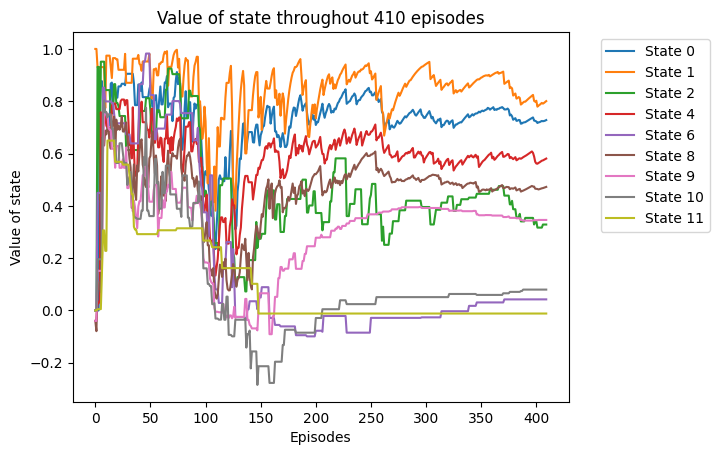

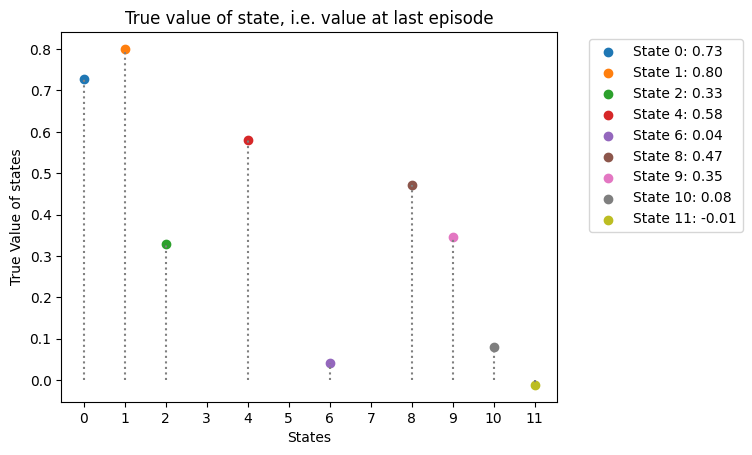

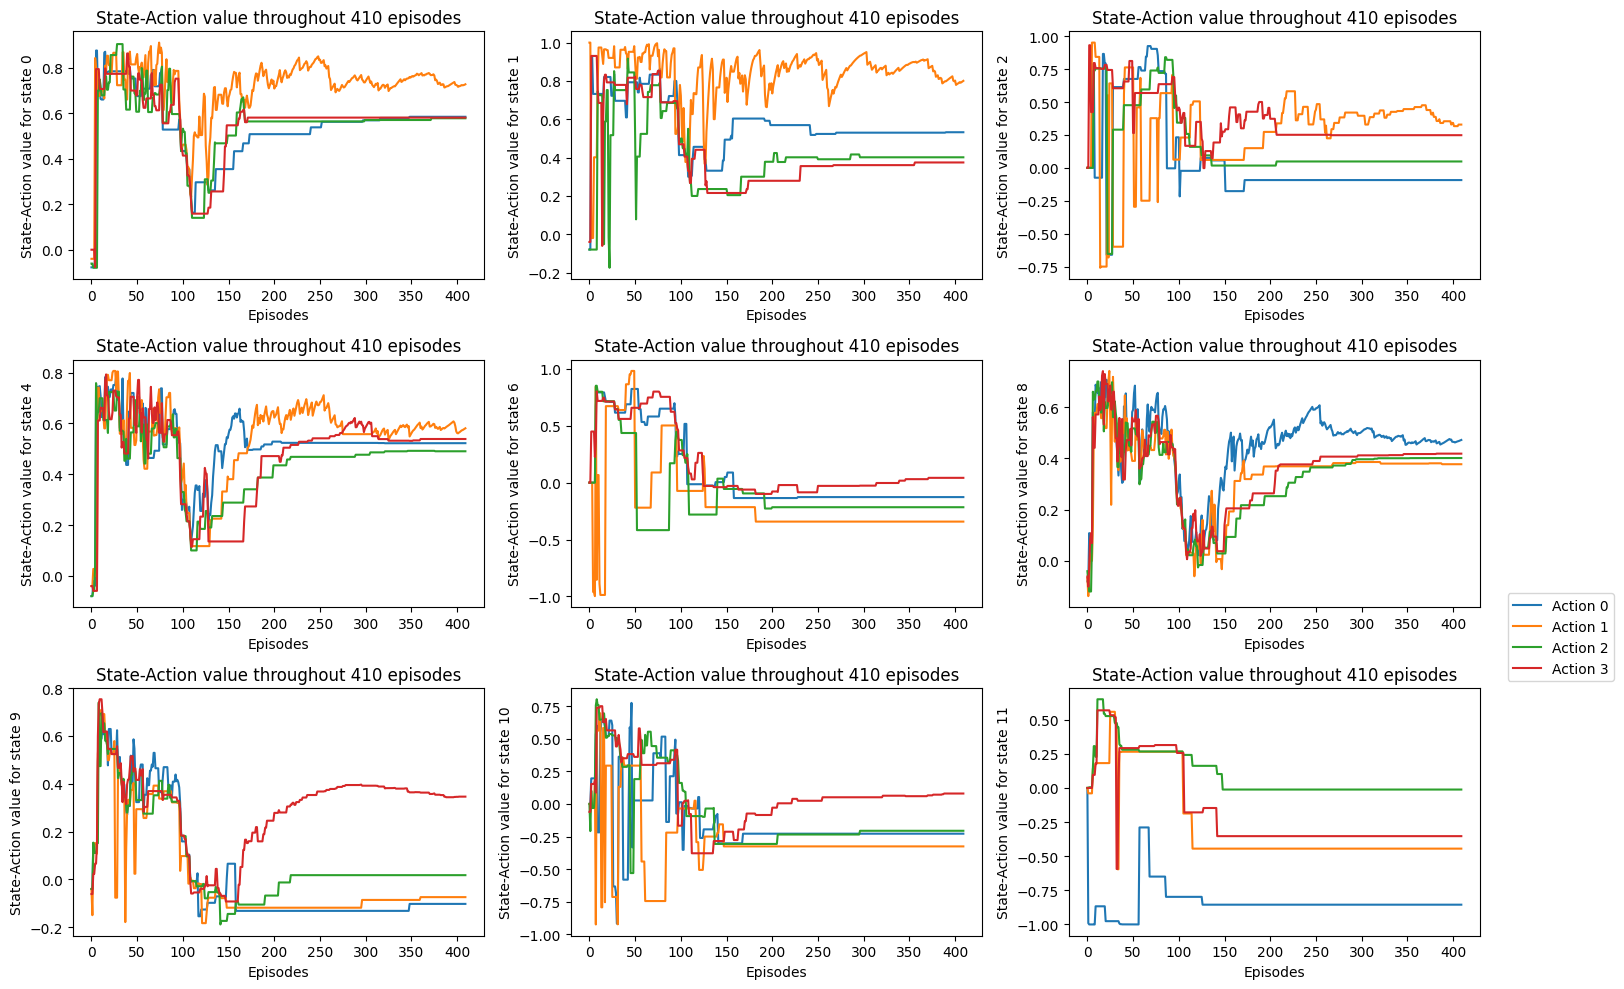

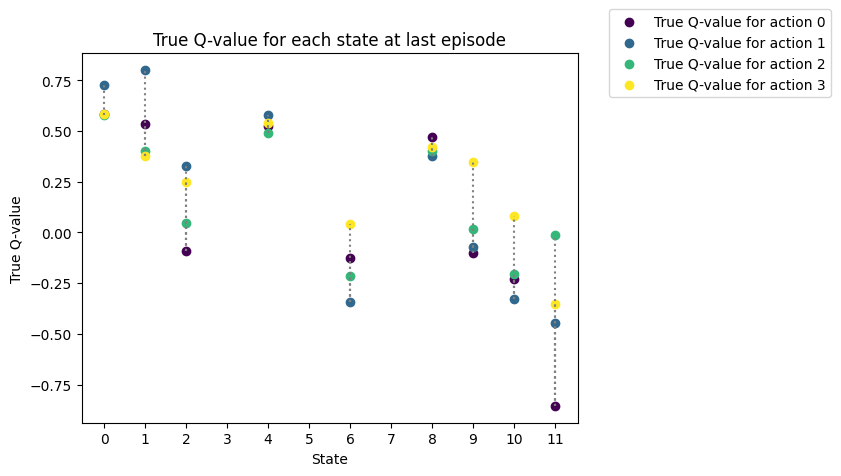

In [348]:
# hyper-parameter tuning
# multiple runs may be required until plot shows up
for lambda_ in np.arange(0, 1.01, 0.01):

    policy7, episodic_q7, value_function7, q7 = Q_lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = True, typeDecay= notypeDecay[0])
    detP, corrA = deterministicPolicy(policy7)

    if corrA[2] == 1 and corrA[4] != 0 and corrA[6] != 1 and corrA[11] != 0:
        print(f'Hyper-parameter lambda: {lambda_}')
        showPlot(policy7, value_function7, episodic_q7, noEpisodes)
        break

Hyper-parameter lambda: 0.53
Stochastic Policy:
           0         1         2         3
0   0.004185  0.987446  0.004185  0.004185
1   0.004185  0.987446  0.004185  0.004185
2   0.004185  0.987446  0.004185  0.004185
3   0.250000  0.250000  0.250000  0.250000
4   0.004185  0.987446  0.004185  0.004185
5   0.250000  0.250000  0.250000  0.250000
6   0.004533  0.004533  0.004533  0.986400
7   0.250000  0.250000  0.250000  0.250000
8   0.987446  0.004185  0.004185  0.004185
9   0.004488  0.004488  0.004488  0.986535
10  0.005163  0.005163  0.005163  0.984512
11  0.056909  0.056909  0.829272  0.056909

Deterministic Policy:
[0.98744557 0.98744557 0.98744557 0.25       0.98744557 0.25
 0.98639995 0.25       0.98744557 0.98653528 0.98451188 0.82927173]

Actions according to deterministic policy: [1 1 1 0 1 0 3 0 0 3 3 2]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | →  | G✥|
  ___  ___  ___  _

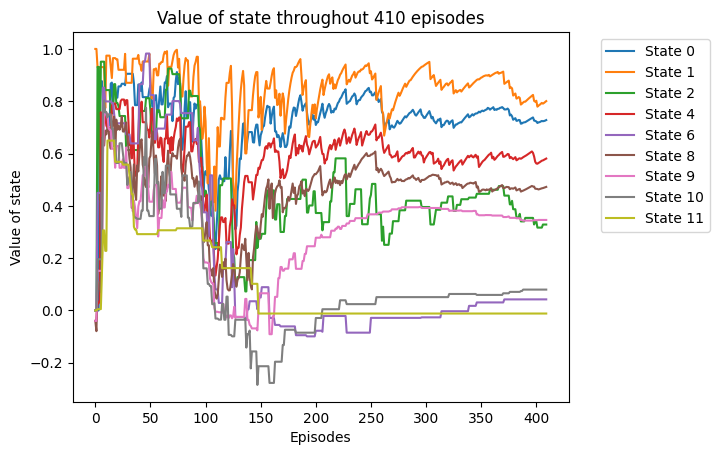

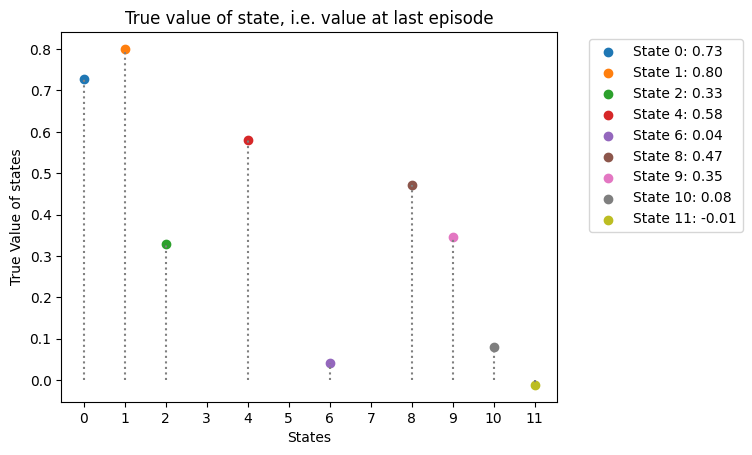

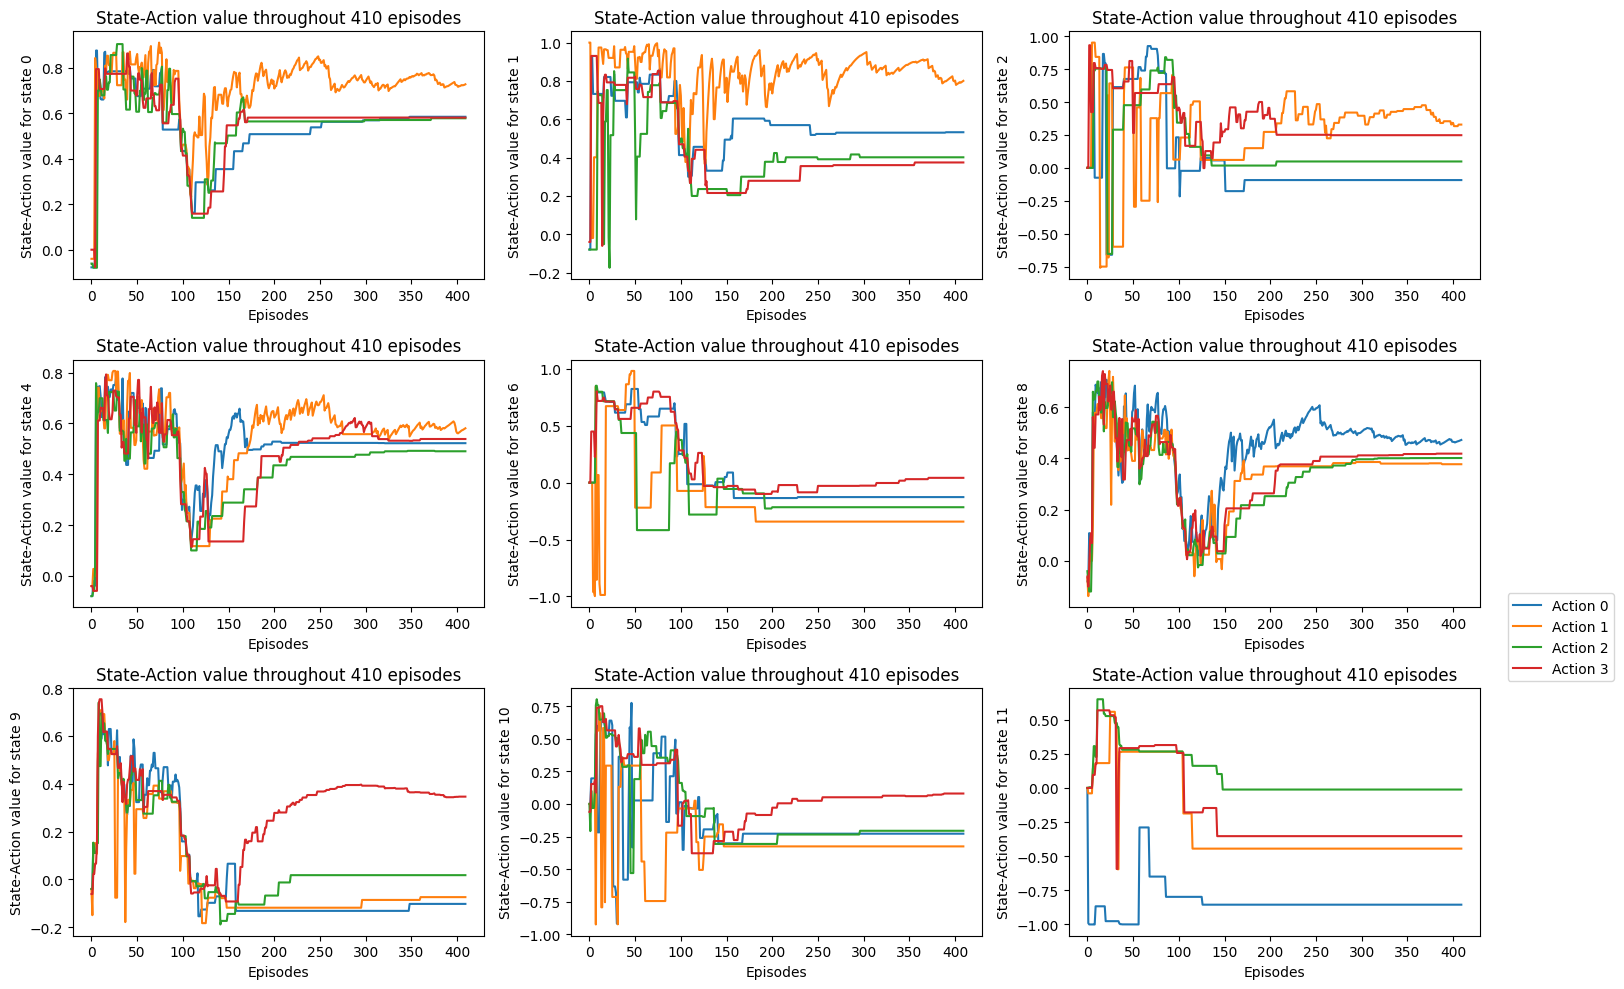

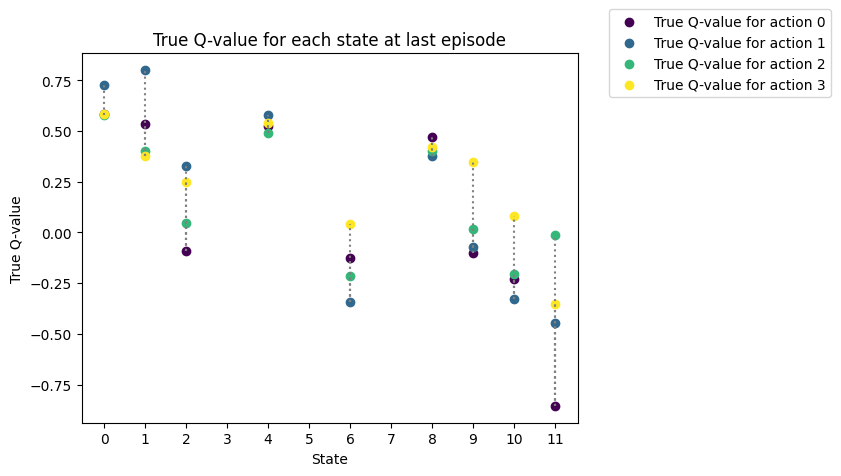

In [349]:
print(f'Hyper-parameter lambda: {lambda_}')
showPlot(policy7, value_function7, episodic_q7, noEpisodes)

# Problem 9

In [380]:
noEpisodes = 500
lambda_ = 0.91
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

Hyper-parameter lambda: 0.92
Stochastic Policy:
           0         1         2         3
0   0.001701  0.994896  0.001701  0.001701
1   0.001701  0.994896  0.001701  0.001701
2   0.001701  0.994896  0.001701  0.001701
3   0.250000  0.250000  0.250000  0.250000
4   0.001701  0.994896  0.001701  0.001701
5   0.250000  0.250000  0.250000  0.250000
6   0.994359  0.001880  0.001880  0.001880
7   0.250000  0.250000  0.250000  0.250000
8   0.994896  0.001701  0.001701  0.001701
9   0.001736  0.001736  0.001736  0.994793
10  0.001736  0.001736  0.001736  0.994793
11  0.005163  0.005163  0.005163  0.984512

Deterministic Policy:
[0.99489575 0.99489575 0.99489575 0.25       0.99489575 0.25
 0.99435893 0.25       0.99489575 0.99479264 0.99479264 0.98451188]

Actions according to deterministic policy: [1 1 1 0 1 0 0 0 0 3 3 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | →  | G✥|
  ___  ___  ___  _

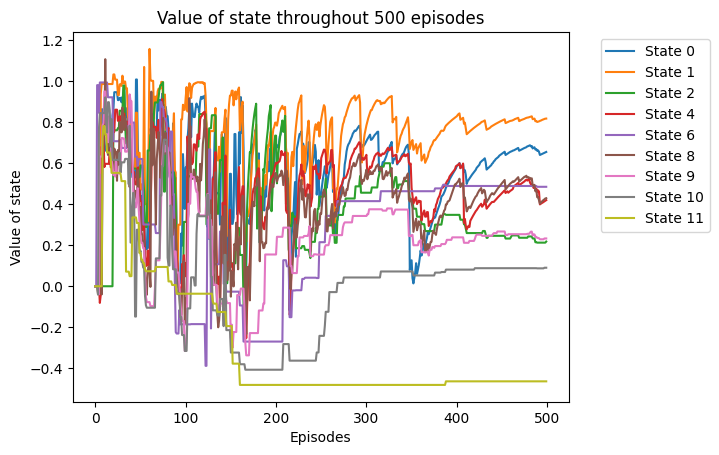

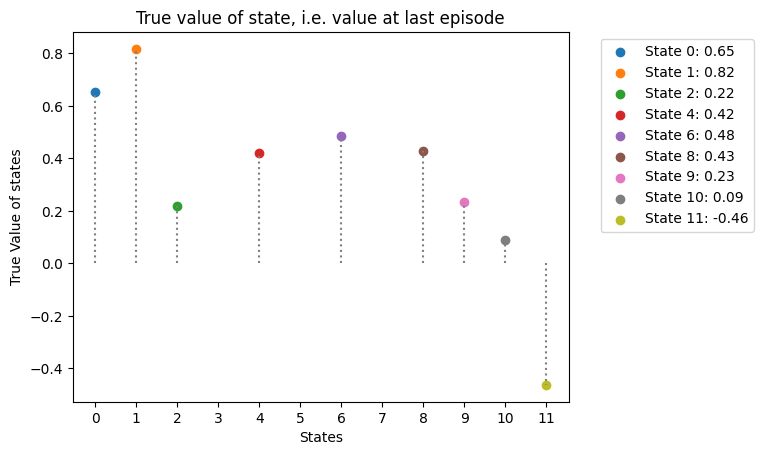

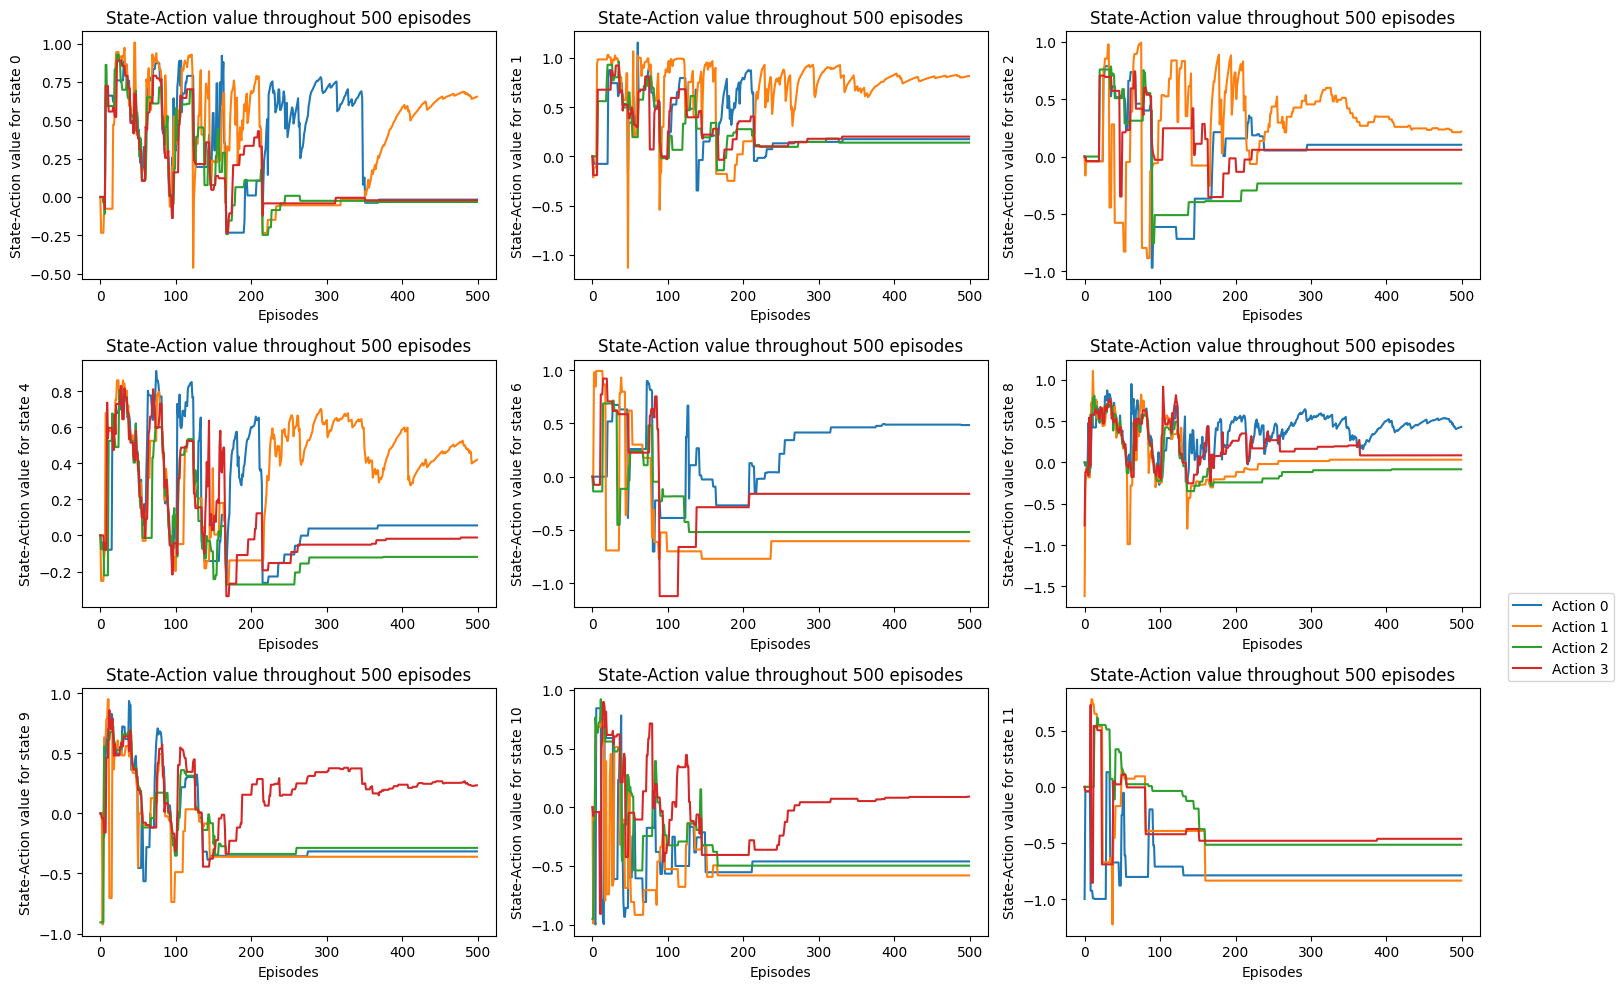

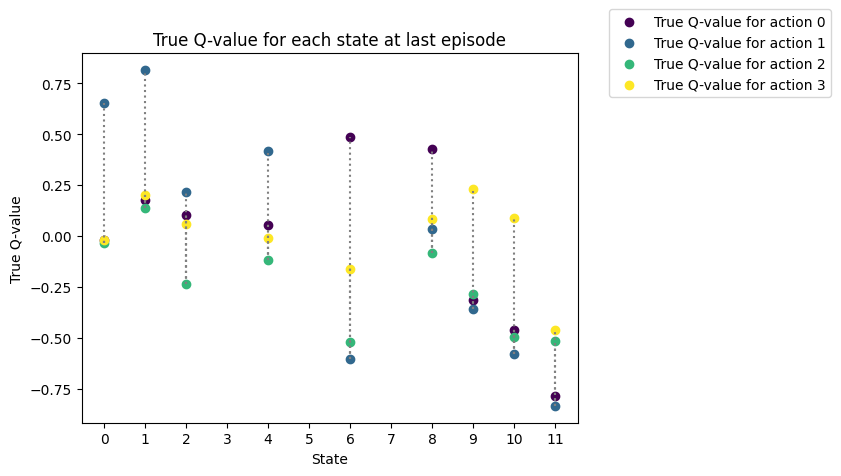

In [389]:
# hyper-parameter tuning
# multiple runs may be required until plot shows up
for lambda_ in np.arange(0, 1.01, 0.01):

    policy8, episodic_q8, value_function8, q8 = Q_lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = False, typeDecay= notypeDecay[0])
    detP, corrA = deterministicPolicy(policy8)

    if corrA[2] == 1 and corrA[6] == 0 and corrA[11] == 3: # I want this!!
        print(f'Hyper-parameter lambda: {lambda_}')
        showPlot(policy8, value_function8, episodic_q8, noEpisodes)
        break

Hyper-parameter lambda: 0.92
Stochastic Policy:
           0         1         2         3
0   0.001701  0.994896  0.001701  0.001701
1   0.001701  0.994896  0.001701  0.001701
2   0.001701  0.001701  0.001701  0.994896
3   0.250000  0.250000  0.250000  0.250000
4   0.994896  0.001701  0.001701  0.001701
5   0.250000  0.250000  0.250000  0.250000
6   0.001825  0.001825  0.001825  0.994526
7   0.250000  0.250000  0.250000  0.250000
8   0.994896  0.001701  0.001701  0.001701
9   0.002343  0.002343  0.002343  0.992971
10  0.002920  0.002920  0.002920  0.991241
11  0.017313  0.017313  0.948061  0.017313

Deterministic Policy:
[0.99489575 0.99489575 0.99489575 0.25       0.99489575 0.25
 0.99452565 0.25       0.99489575 0.9929708  0.99124107 0.94806083]

Actions according to deterministic policy: [1 1 3 0 0 0 3 0 0 3 3 2]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | ←  | G✥|
  ___  ___  ___  _

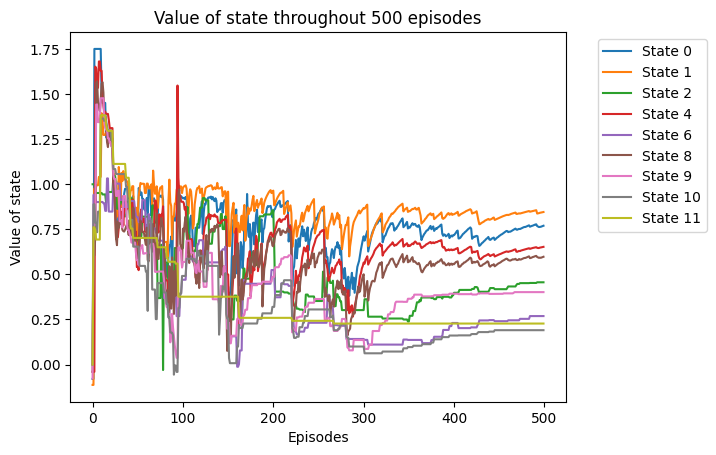

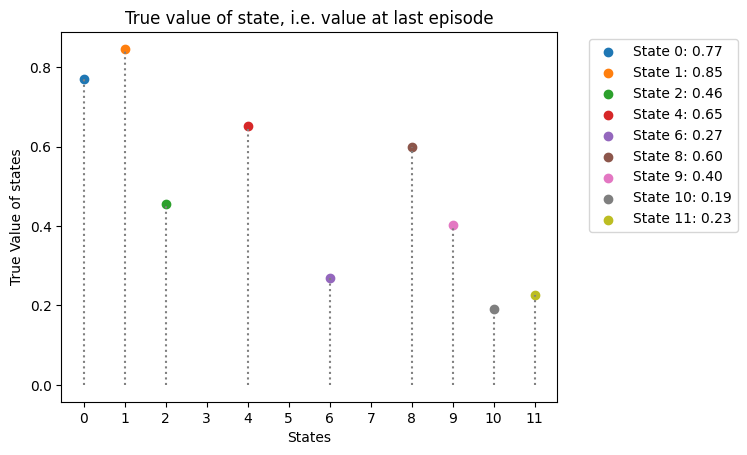

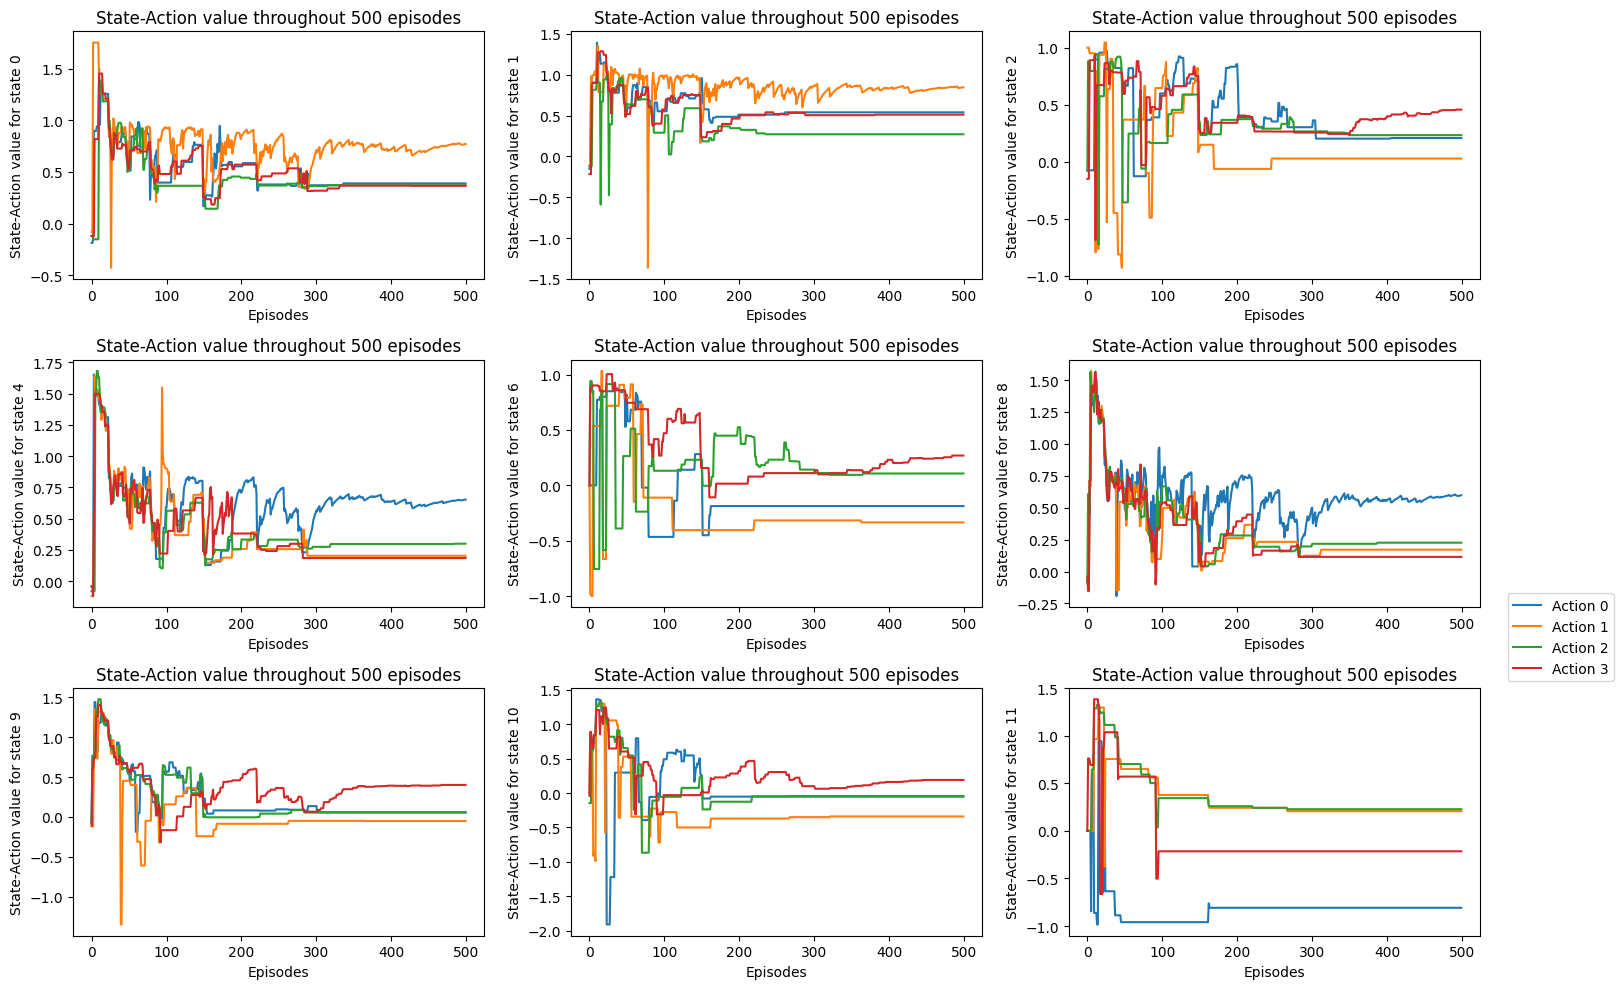

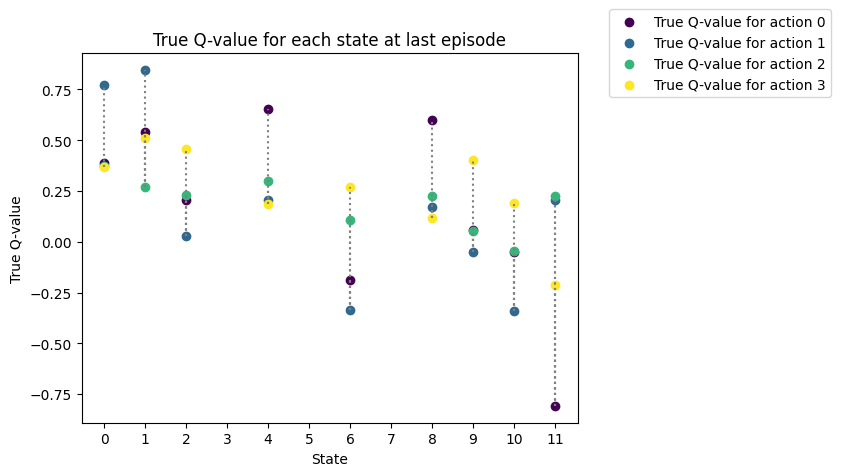

In [390]:
policy8, episodic_q8, value_function8, q8 = Q_lambda(env, gamma, decayConstAlpha, decayConstEpsilon, lambda_, noEpisodes, replaceTrace = False, typeDecay= notypeDecay[0])
print(f'Hyper-parameter lambda: {lambda_}')
showPlot(policy8, value_function8, episodic_q8, noEpisodes)

# Problem 10

In [398]:
noEpisodes = 500
noPlanning = 50
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

In [399]:
# random.seed(9)
policy9, episodic_q9, value_function9, q9 = dynaQ(env, gamma, noEpisodes, noPlanning,decayConstAlpha, decayConstEpsilon, typeDecay = notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.001701  0.994896  0.001701  0.001701
1   0.001701  0.994896  0.001701  0.001701
2   0.994896  0.001701  0.001701  0.001701
3   0.250000  0.250000  0.250000  0.250000
4   0.994896  0.001701  0.001701  0.001701
5   0.250000  0.250000  0.250000  0.250000
6   0.994415  0.001862  0.001862  0.001862
7   0.250000  0.250000  0.250000  0.250000
8   0.994896  0.001701  0.001701  0.001701
9   0.001938  0.001938  0.001938  0.994187
10  0.002057  0.002057  0.002057  0.993828
11  0.020317  0.020317  0.020317  0.939049

Deterministic Policy:
[0.99489575 0.99489575 0.99489575 0.25       0.99489575 0.25
 0.99441506 0.25       0.99489575 0.99418714 0.99382769 0.93904882]

Actions according to deterministic policy: [1 1 0 0 0 0 0 0 0 3 3 3]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | ↑  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ↑  | H✥ |
  __

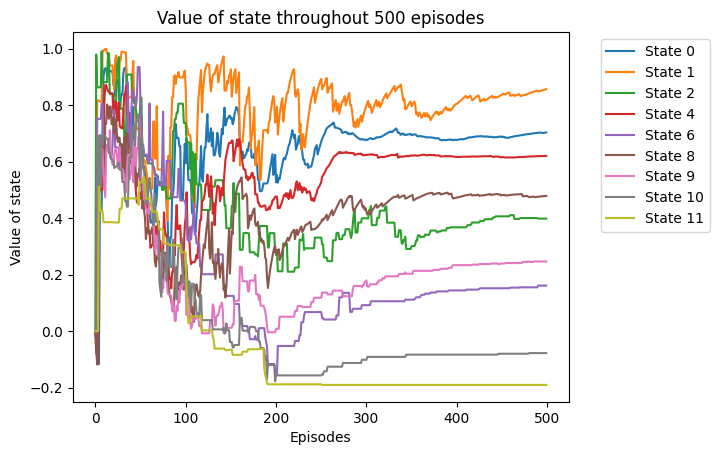

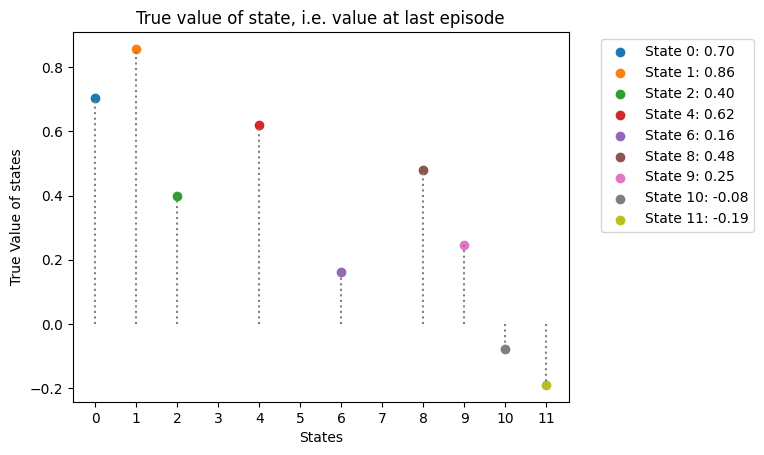

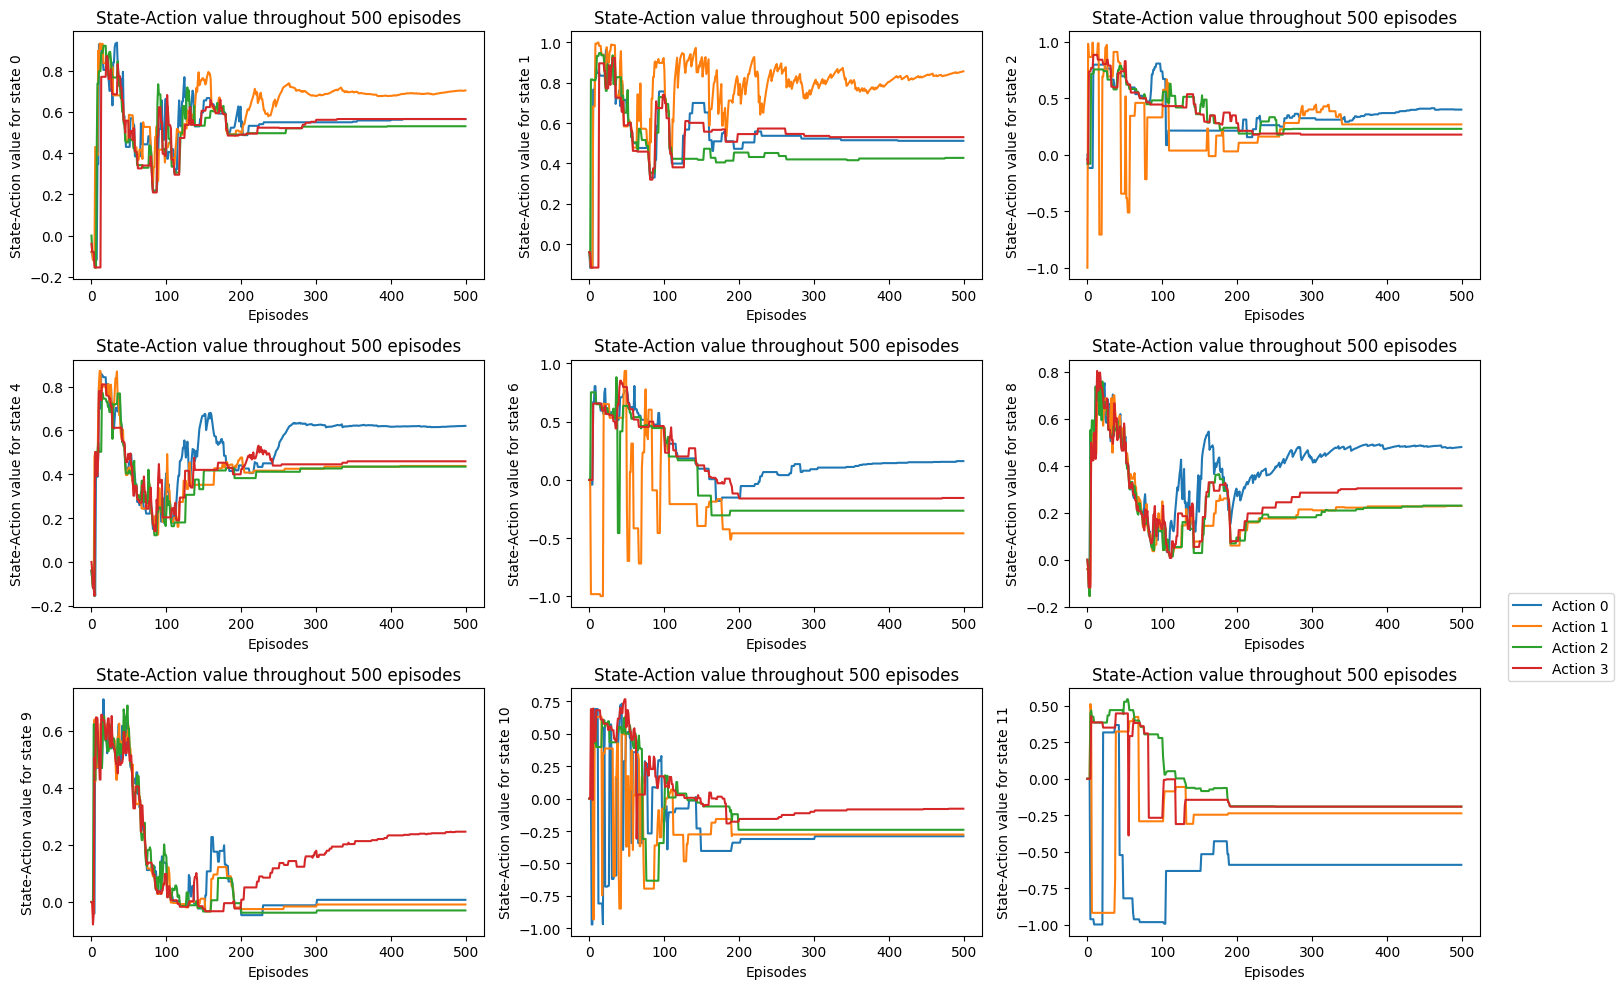

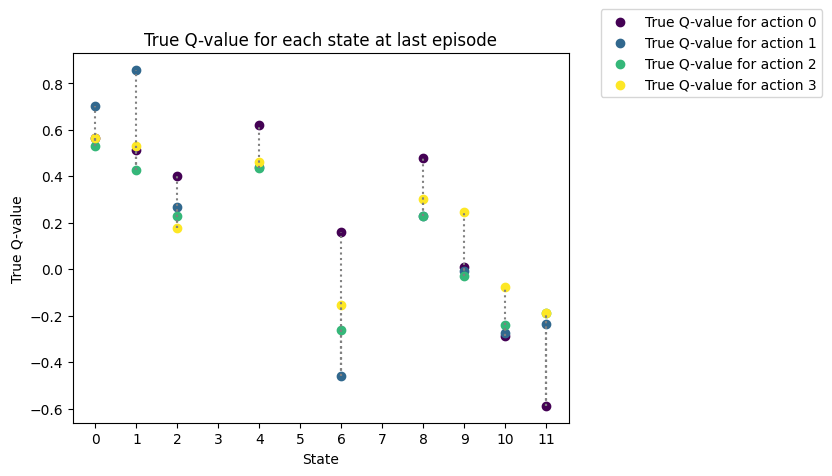

In [400]:
showPlot(policy9, value_function9, episodic_q9, noEpisodes)

# Problem 11

In [432]:
noEpisodes = 1000
maxTrajectory = 100
decayConstAlpha = 0.01 #for higher value, with each episode, changes value of q slower than previous episode
decayConstEpsilon = 0.01 #for higher value, starts exploiting earlier than for lower value and changes policy slowly with each episode

In [433]:
# random.seed(10)
policy10, episodic_q10, value_function10, q10 = trajectorySampling(env, gamma, decayConstAlpha, decayConstEpsilon, maxTrajectory, noEpisodes, typeDecay = notypeDecay[0])

Stochastic Policy:
           0         1         2         3
0   0.000011  0.999966  0.000011  0.000011
1   0.000011  0.999966  0.000011  0.000011
2   0.999966  0.000011  0.000011  0.000011
3   0.250000  0.250000  0.250000  0.250000
4   0.999966  0.000011  0.000011  0.000011
5   0.250000  0.250000  0.250000  0.250000
6   0.000012  0.000012  0.999965  0.000012
7   0.250000  0.250000  0.250000  0.250000
8   0.999966  0.000011  0.000011  0.000011
9   0.000012  0.000012  0.000012  0.999965
10  0.000012  0.000012  0.000012  0.999965
11  0.000012  0.000012  0.999965  0.000012

Deterministic Policy:
[0.99996561 0.99996561 0.99996561 0.25       0.99996561 0.25
 0.99996456 0.25       0.99996561 0.99996456 0.99996456 0.99996456]

Actions according to deterministic policy: [1 1 0 0 0 0 2 0 0 3 3 2]

------------------------------------------------------------------------------------------
Maze Environment:
  ___  ___  ___  ___ 
| →  | →  | ↑  | G✥|
  ___  ___  ___  ___ 
| ↑  | W✥| ↓  | H✥ |
  __

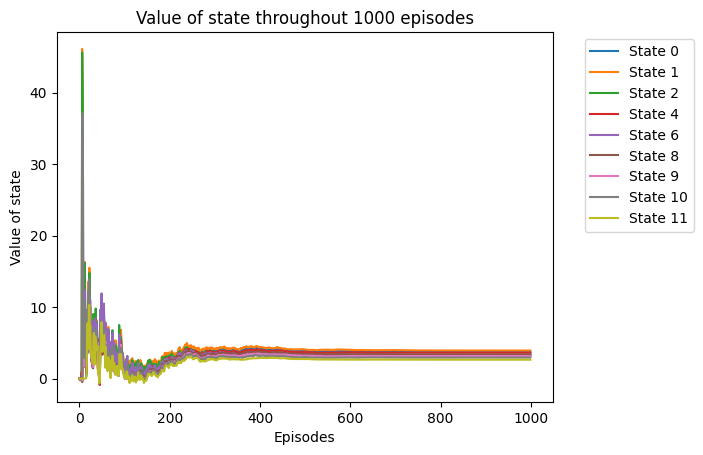

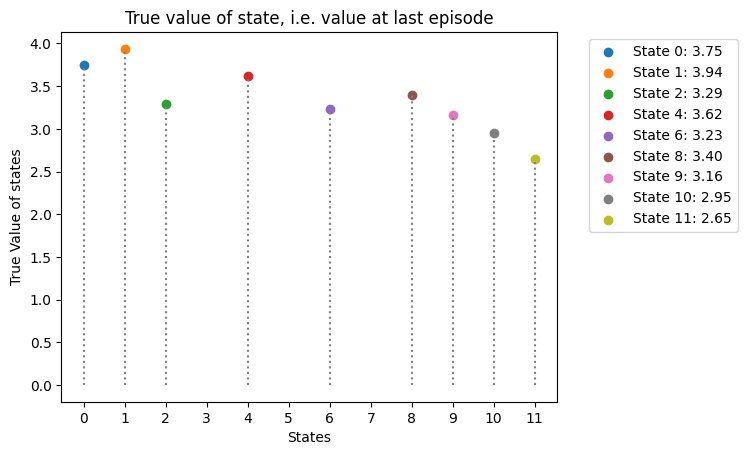

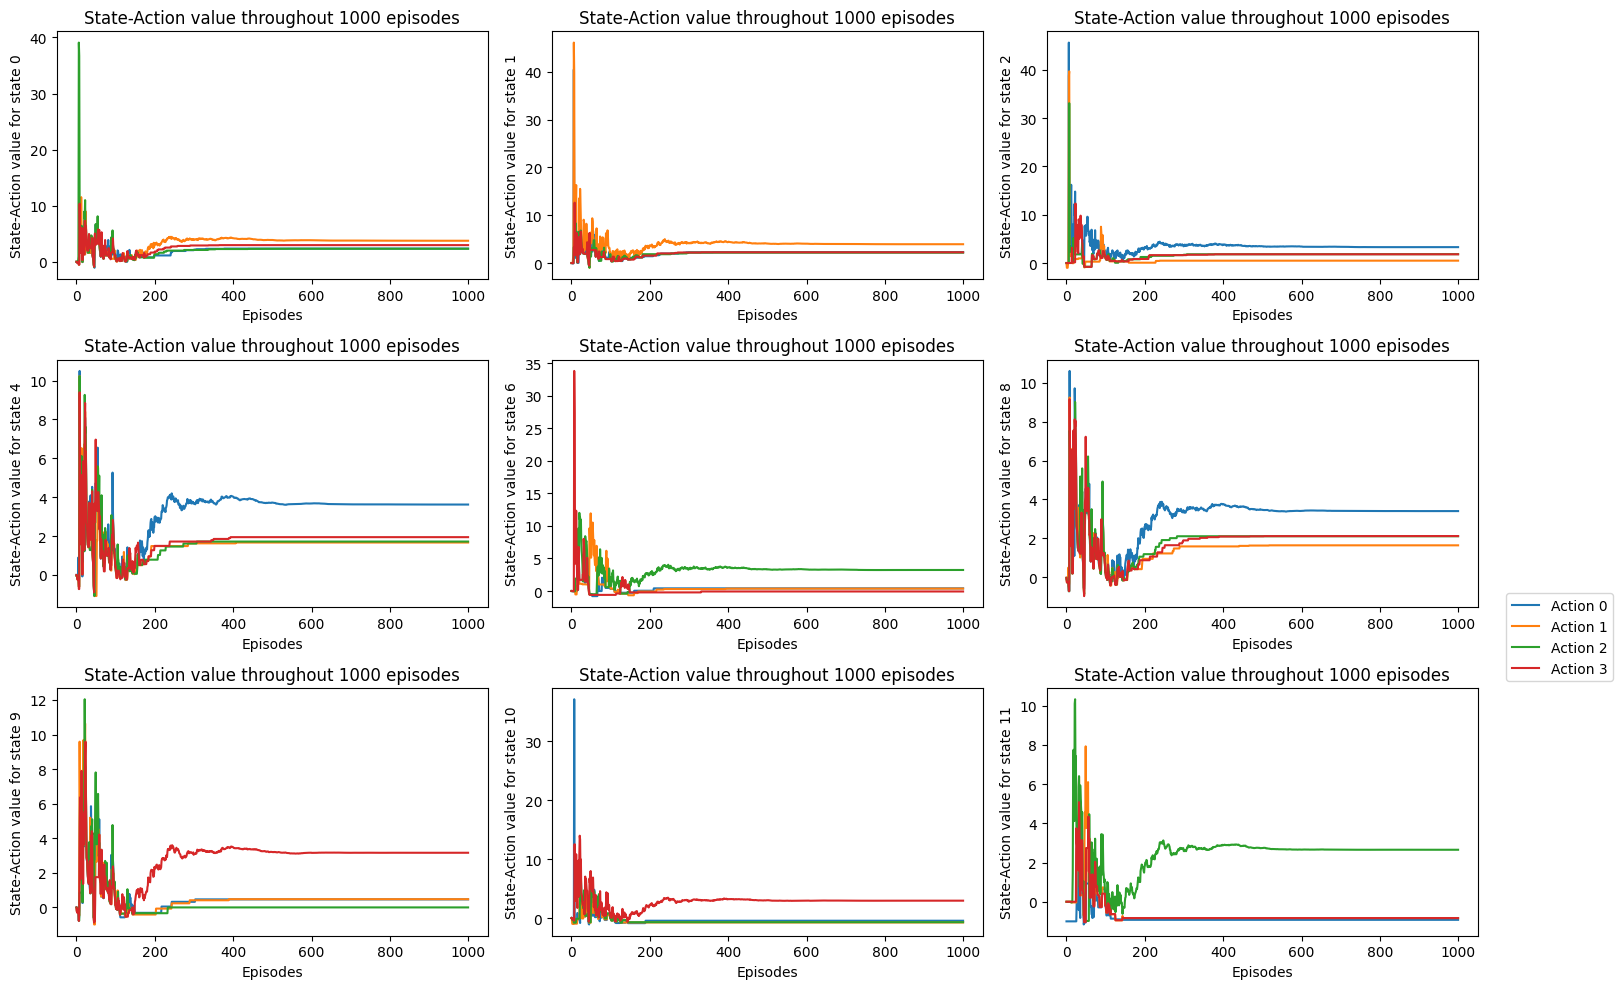

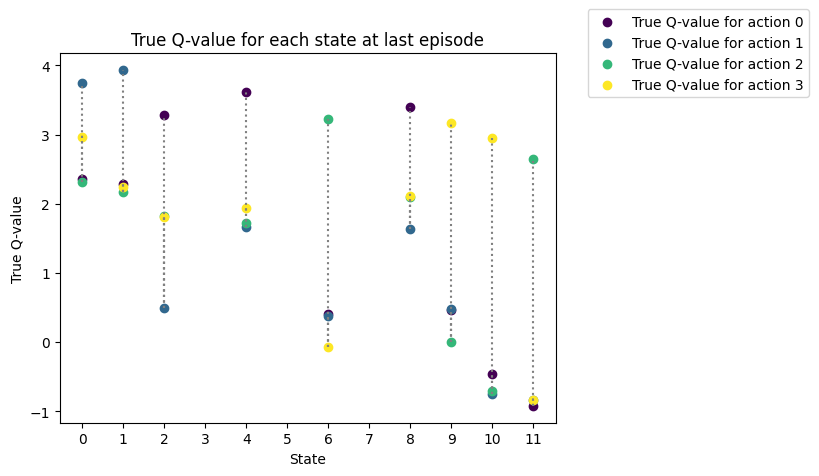

In [434]:
showPlot(policy10, value_function10, episodic_q10, noEpisodes)